# Bridged T Coil
Last update: 5 Aug 2025

:::{.callout-note}  
- Some of the narration in this notebook was generated by Google's Gemini, then modified by me.  
- This chapter is an early draft document
  - spell and grammar checking has not been completed 
  - posted for test purposes  
  - text in bold red are notes for the author

<!--
The Quarto directive ``code-fold`` is set to true, which means that the Python code cells are not expanded. This makes the narrative stand out and easier to check for gaps in the written explanation. The cells containing code can be displayed by clicking on the **Code** button. In the header of this page the **Code** menu provides options for displaying or hiding all the code. When the code is hidden, only the output from the code is displayed. As you can see in this draft version, the written narrative is a bit sparse and the flow is broken up since when the code is displayed it provides the illusion of being self explanatory. I'm going to try to fix this as I continue to edit the document.  

``code-fold``  will be set to false for final publication.
-->

:::

renamed versio 0 and saved before re-organizing the notebook.  
Now saved as version 1

This file is is MNA problem circuits folder

Schematics are in /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/


ToDo

- review old notebook in downloads and get some of the introduction narrative
- need to determine the outline and what circuits will be analyized, 
  - See /home/jeff32/Documents/JupyterLab/Node Analysis/MNA_problem_circuits/Bridged-T-coil.ipynb
  - Bob Ross's circuit and equations. Can these be drived? <--- need to work on this section
  - ESD Protection and matching
  - A common-source stage with T-coil peaking, bandwith enhansment
- ~do all the examples have coupled inductors? what is the phasing?~ - yes, phasseing looks correct
- ~make a copy of the notebook as a backup and start to cleanup and re organize~ 
- generate schematics for constant R, ESD and bandwidth enhanment. These are follow on sections after "Basic Idea"

@fig-t-coil2

@fig-t-coil3

@fig-t-coil4

@williams1991, art of analog design

@Jeong2020, bandwidth extension, IC design 

@Razavi2015, IEEE article

@Ross2011, slide show presentation

**get references for other papers used here.**


patents  

@lin2015

@fan2020

## Introduction
This Jupyter notebook is about an interesting circuit called the Bridge T-Coil shown in @fig-t-coil-fig_14-6. I first became aquanted with the Bridge T-Coil circuit when reading through *Analog Circuit Design: Art, Science and Personalities*, editited by @williams1991. It was kind of suprizing to me that I hadn't come across this circuit before since I had been a practicing electrical engineer for more than 20 years at the time. Chapter 14 in the book is about Fast Vertical Amplifiers, which are amplifiers used in oscilliscopes. Figure 14-6 in the book is a schematic of an asymmetrical T-Coil circuit and some equations, the derivation of the equations was described as complex and they were considered a trade secret. This description intreged me and prompted me learn a bit more about the Bridge T-Coil.

<!--

- what is this notebook about - BTC
- why is it interesting 
- describe Jim Williams' edited book and the chapter about high speed verticl amps 
- Fig XX schematics and equations.


Jim Williams' edited book, "Analog Circuit Design: Art, Science and Personalities" (and its subsequent volumes like "The Art and Science of Analog Circuit Design" and "Analog Circuit Design, Volume 2: Immersion in the Black Art of Analog Design"), is not a typical textbook or reference guide. Instead, it offers a unique and multifaceted exploration of analog circuit design, emphasizing the practical, intuitive, and even artistic aspects of the field.

Here are the key themes and characteristics of the book:

* **Art, Science, and Personalities:** The title itself highlights the core approach. The book posits that analog design is as much an art as it is a science, and it showcases this by featuring contributions from numerous prominent analog designers. Readers gain insight into the diverse philosophies, thought processes, and problem-solving techniques of these experts.
* **Beyond Theory: Practicality and Intuition:** While fundamental theory is implicitly present, the book heavily emphasizes real-world applications, practical considerations, and the development of intuition. It's about how to *do* analog design, often encouraging experimentation and hands-on learning over purely theoretical exercises. Jim Williams himself was known for his "laboratory-based material that's worked out and documented."
* **The "Analog Way":** The book advocates for a "broad, flexible method of thinking about analog design tasks." This involves understanding trade-offs, making workable approximations, and visualizing the operation of circuits rather than relying solely on simulations or rigid mathematical formulas.
* **Diverse Perspectives:** By including contributions from various designers, the book presents a range of styles and approaches to analog design. This aims to empower readers to find their own method that "feels right" and to encourage experimentation. It shows that there isn't one "right" way to design.
* **Emphasis on Problem Solving and Troubleshooting:** Many sections delve into how designers approach and solve complex analog problems, including troubleshooting. The idea of learning from "broken instruments" and understanding why things *don't* work is a recurring motif, as it forces a deeper understanding of circuit behavior.
* **Real-World Constraints:** The book acknowledges that analog design operates within real-world constraints such as cost, size, power, and manufacturing realities. It often discusses how economic factors influence design choices.
* **A "Tour Through the World of Analog Design":** More than just a collection of circuits, the book serves as a journey into the mindset of analog engineers, exploring the historical context, the challenges, and the rewards of the profession.

In essence, Jim Williams' "Analog Circuit Design" books are celebrated for their ability to demystify analog design, showcasing it not as a purely academic discipline, but as a craft demanding experience, intuition, and a deep understanding of component behavior in the real world.


**write me a description of Jim Williams' edited book, "Analog Circuit Design: Art, Science and Personalities"**
-->

Before describing the Bridge T-Coil, I would like to say a few words about *Analog Circuit Design: Art, Science and Personalities*. In the world of electronics, certain books transcend the typical textbook format to become celebrated resources that shape a generation of engineers. Jim Williams' edited book is one such work. More than just a collection of technical articles, it is a curated journey into the minds of some of the most brilliant and innovative thinkers in the field of analog design.

This unique book presents a fascinating perspective on the practice of circuit design, going beyond the dry theory of textbooks to explore the creative, intuitive, and sometimes idiosyncratic processes that lead to breakthrough designs. The book is divided into four main sections - What is Analog Design?, The Making of an Analog Engineer, Intuitions and Insights and finally Techniques, Tips and Applications.

This is perhaps the most distinctive and beloved section of the book. It features contributions from a "who's who" of analog circuit design, including luminaries like Bob Pease, George A. Philbrick, Barry Gilbert, and Williams himself. The articles in this section are often personal and anecdotal, revealing the thought processes, clever tricks, and practical wisdom gained from decades of hands-on work. It's a rare glimpse into the practical, real-world challenges and triumphs of these engineering giants.

Jim Williams, a legendary analog designer and application engineer at Linear Technology (now part of Analog Devices), was uniquely positioned to bring this project to fruition. His own passion for the craft and his deep connections within the industry allowed him to assemble this extraordinary collection of essays.

"Analog Circuit Design" is not a book for beginners; it assumes a certain level of familiarity with electronics. However, for experienced engineers, hobbyists, and students seeking to transition from theory to practice, it is an invaluable resource. It serves as a source of inspiration, a practical guide, and a historical document that captures the "golden age" of analog circuit design through the eyes and hands of its masters. The book celebrates the idea that great circuit design is a fusion of rigorous scientific knowledge, creative artistry, and a healthy dose of personal ingenuity.


### Fast Vertical Amplifiers
The Bridge T-Coil circuit was introduced in @williams1991 in the Chapter 14, titled, Geood Engineering and Fast Vertical Amplifiers, by John Addis. A fast vertical amplifier is a critical component of an analog oscilloscope. It takes a small input signal, amplifies it, and drives the vertical deflection plates of a cathode-ray tube (CRT), causing the electron beam to move up and down in proportion to the input signal's voltage. This action creates the vertical trace on the screen, which represents the signal's amplitude. The "fast" aspect of these amplifiers refers to their high bandwidth, allowing them to accurately amplify high-frequency signals.

The history of fast vertical amplifiers is intertwined with the development of the oscilloscope itself. The first oscilloscopes, or oscillographs, were electromechanical devices invented by French physicist André Blondel in the late 19th century. These had a very limited frequency response (in the kilohertz range).

A major leap came with German physicist Karl Ferdinand Braun's invention of the cathode-ray tube (CRT) in 1897. The CRT was the first electronic display oscilloscope. However, early CRTs had stability issues. It wasn't until Vladimir K. Zworykin's 1931 invention of a permanently sealed, high-vacuum CRT with a thermionic emitter that the oscilloscope became a practical, commercial tool. This stable CRT allowed for the creation of usable oscilloscopes by companies like General Radio.

For decades, the design of vertical amplifiers relied on vacuum tubes* (also known as valves). These early amplifiers used thermionic valves to amplify the signal, with the design often employing a push-pull output stage. This was a differential amplifier that provided two signals of opposite polarity to the vertical deflection plates of the CRT. This push-pull configuration had several advantages, including the cancellation of unwanted signals (like power supply hum), suppression of even harmonics, and greater power output.

The development of new amplifier topologies and the use of negative feedback, a technique invented by Harold Stephen Black in 1927, allowed designers to trade some gain for reduced distortion and other benefits. This was a crucial step toward building more accurate and faster amplifiers. The period following World War II, fueled by technical advancements and a growing consumer market, became a "golden age" for valve development and amplifier circuit design. 

<!--
**The Transistor and Integrated Circuit Revolution**

The invention of the transistor in 1947 marked the beginning of the end for the vacuum tube's dominance. Transistors were smaller, more reliable, and consumed less power. This led to the development of smaller, more portable oscilloscopes. As integrated circuit (IC) technology advanced, vertical amplifiers became integrated onto single chips, leading to further reductions in size and improvements in performance.

The 1960s saw the development of some of the first practical IC operational amplifiers ("op-amps"), which were a key building block for modern amplifier designs. These early IC op-amps, such as the Fairchild µA702 designed by Bob Widlar, were a remarkable achievement, capable of useful bandwidths of 20-30 MHz. Over time, improvements in IC technology allowed for ever-faster vertical amplifiers, pushing the bandwidth of analog oscilloscopes into the gigahertz range before the advent of digital oscilloscopes.
-->

The schematic below is from the [Tektronix 545A Instrunction Manual](https://www.tek.com/en/manual/545a-instruction-manual), which was a pioneering high-performance oscilloscope that became a standard in the electronics industry during the late 1950s and 1960s. It was a crucial tool for engineers and scientists working on complex systems, from early computers to the U.S. space program.

In the schematic you can see the tube's plate and grid connected to a series of center tapped inductors. This arrangement is a series of Bridged T-coils. 

![Sch from Tek manual](Vert_Amp_Sch_Screenshot.png){#fig-vert_amp_sch_screenshot}

The history of fast vertical amplifiers is intrinsically linked to the evolution of the oscilloscope, a fundamental tool for visualizing electrical signals. The quest for higher bandwidth and greater fidelity has driven continuous innovation in amplifier design, moving from bulky vacuum tubes to compact, high-performance solid-state devices.

Here's a breakdown of the key periods and advancements:

**1. The Vacuum Tube Era (Early 20th Century to 1960s):**

* **Early Beginnings (Pre-1940s):** The cathode ray tube (CRT) was invented by Karl Ferdinand Braun in 1897, laying the groundwork for the oscilloscope. Early CRTs were more laboratory curiosities, and the challenge was to create stable and accurate deflection of the electron beam. The invention of the triode vacuum tube by Lee De Forest in 1906 was the first active device capable of signal amplification, making practical oscilloscopes possible.
* **The Rise of Specialized Amplifiers (1940s-1950s):** As oscilloscopes became more sophisticated, the need for wideband vertical amplifiers became critical. These early amplifiers were entirely built with vacuum tubes.
    * **Challenges:** Vacuum tubes were inherently bulky, consumed significant power, generated considerable heat, and had limitations in terms of high-frequency performance due to parasitic capacitances. Achieving wide bandwidth required clever circuit design, often involving complex distributed amplifier topologies to overcome these limitations.
    * **Key Innovation - The Triggered Sweep:** Howard Vollum of Tektronix invented the world's first triggered oscilloscope in 1946 (Model 511). This was a monumental breakthrough because it allowed stable display of non-repetitive signals and precise time measurements, making the performance of the vertical amplifier even more crucial.
    * **Tektronix Dominance:** Tektronix emerged as a leader in oscilloscope design during this period, constantly pushing the boundaries of bandwidth. Their early models like the 501, 515A, and the popular 547 (which introduced the innovative "ALT" mode for dual traces) relied on intricate vacuum tube amplifier designs.
    * **Plug-in Modules:** In the late 1950s, Tektronix introduced the concept of plug-in modules (e.g., 530 and 540 series), allowing users to swap vertical input or horizontal sweep units. This provided flexibility and allowed for specialized, high-performance vertical amplifiers to be developed for different measurement needs.

**2. The Transition to Solid-State (1960s-1980s):**

* **The Advent of Transistors (1947 onwards):** The invention of the transistor at Bell Labs in 1947 began to revolutionize electronics. While early transistors had limitations in terms of power and frequency, their potential for miniaturization, lower power consumption, and improved reliability was undeniable.
* **Gradual Replacement of Tubes:** The transition from vacuum tubes to transistors in oscilloscopes was not immediate. Early transistorized amplifiers often combined a "Nuvistor" (a miniature ceramic tube) in the input stage for high impedance and low noise, followed by transistorized stages.
    * **Tektronix Model 321 (1961):** This was a significant milestone – possibly the world's first practical portable oscilloscope, capable of running on AC or batteries. Its vertical amplifier largely utilized transistors. The all-transistor Model 321A followed soon after.
* **Increased Bandwidth and Portability:** As transistor technology matured, vertical amplifiers achieved higher bandwidths with smaller footprints and lower power consumption. The Tektronix 400 series (e.g., 453, 454, 465, 470, 480) in the 1960s and 70s exemplified this, offering portable oscilloscopes with bandwidths reaching hundreds of MHz. These were still complex designs, often using custom-designed integrated circuits fabricated by Tektronix themselves to achieve peak performance.
* **Integrated Circuits (ICs):** The development of integrated circuits in the mid-1960s further accelerated the advancement of vertical amplifiers. Custom ICs allowed for more complex and precise amplifier designs to be integrated onto a single chip, reducing component count, improving reliability, and pushing bandwidth limits.

**3. The Digital Era and Beyond (1980s-Present):**

* **Digitizing Oscilloscopes:** The 1980s saw the emergence of digitizing storage oscilloscopes (DSOs), which converted analog signals into digital data for storage and analysis. While the display technology changed, the need for high-performance analog front-ends, including fast vertical amplifiers, remained crucial for accurate signal acquisition before digitization.
* **Continued Bandwidth Expansion:** The demand for ever-higher bandwidth continued, driven by advances in computing, telecommunications, and high-speed digital electronics. Vertical amplifiers in modern oscilloscopes can achieve bandwidths in the tens of gigahertz (GHz), utilizing advanced silicon technologies (like SiGe and InP) and sophisticated amplifier architectures (e.g., distributed amplifiers, differential designs, and preamplifiers optimized for low noise and high gain-bandwidth product).
* **Advanced Features:** Modern vertical amplifiers are often integrated with features like digital predistortion (DPD) to compensate for nonlinearities, advanced triggering capabilities, and deeper memory for capturing long signal records, all of which rely on the underlying speed and fidelity of the analog amplification chain.

In summary, the history of fast vertical amplifiers is a testament to continuous innovation in electronic design, driven by the relentless demand for higher performance in instrumentation. From the ingenuity required to harness vacuum tubes for wideband amplification to the precision of modern IC-based designs, the vertical amplifier remains a critical component in accurately capturing and displaying the world's fastest electrical signals.


John Addis is a legendary figure in the world of analog electronics, particularly known for his significant contributions to Tektronix's oscilloscopes, especially their fast vertical amplifiers. While there isn't one single consolidated "history of fast vertical amplifiers" written *by* John Addis readily available as a published book or extensive article, his work and insights are deeply embedded in the history of these devices, and he has certainly shared his knowledge through various channels (patents, internal Tektronix documents, and informal discussions).

From what's known about John Addis's career and the development of fast vertical amplifiers at Tektronix, his "history" would essentially trace the evolution of these crucial components within high-performance oscilloscopes. Here's a summary of the key aspects that would likely be covered, heavily influenced by Addis's known contributions:

**Early Challenges of High-Bandwidth Amplifiers:**

* **The Need for Speed:** As electronics became faster, especially with the rise of digital and pulse technologies, the demand for oscilloscopes that could accurately display increasingly higher frequencies and faster rise times became paramount. This directly drove the need for faster vertical amplifiers.
* **Limitations of Vacuum Tubes:** Early oscilloscopes relied on vacuum tubes, which presented challenges in achieving wide bandwidths due to their inherent capacitances and limited transconductance at high frequencies.
* **Distributed Amplifiers:** A key innovation in the early days was the **distributed amplifier** (or "T-coil" amplifier, as Addis was often associated with them). This design technique allowed for higher bandwidths by distributing the gain elements and effectively creating a transmission line to combine their outputs. Addis was a prolific and able designer of T-coil-based amplifiers.

**The Transistor Revolution and Beyond:**

* **Transition to Solid State:** The advent of transistors brought significant advantages in terms of size, power consumption, and eventually, speed. Designing wideband amplifiers with transistors presented new challenges but also new opportunities.
* **Tektronix's Dominance:** Tektronix was a pioneer and long-time leader in oscilloscope technology, and a huge part of their success was due to their ability to design and produce cutting-edge vertical amplifiers. John Addis was at the forefront of this effort.
* **Key Tektronix Oscilloscopes and Plugins:** Addis's work is directly tied to a succession of iconic Tektronix products. He was involved in the design of vertical amplifiers for instruments like the:
    * **7A11:** A significant vertical amplifier plugin in the 7000 series. Interestingly, Addis himself apparently set the 20 MHz bandwidth limit on an optional lowpass filter for the 7A11, simply to reject TV broadcast interference.
    * **7A29:** This was a critical plugin for the legendary **Tektronix 7104 1 GHz oscilloscope**. Addis was the Project Engineer for the vertical system of the 7104, designing the 7A29 plugin and its associated integrated circuits. The 7104 was a monumental achievement, pushing the boundaries of real-time oscilloscope performance to 1 GHz.
    * **11A32, 11A34, 11A52 (and potentially 11A33):** These were vertical amplifiers for the 11000 series oscilloscopes, representing further advancements in analog design and integrated circuit technology for high-speed applications.
* **Innovations in Circuit Design:** Addis was known for his mastery of analog integrated circuit design for high-speed oscilloscopes. His patents reflect a deep understanding of techniques for achieving precision, fast overdrive recovery, wide bandwidth, and DC level shifting in high-performance amplifiers.
* **The "Art" of Analog Design:** Consistent with Jim Williams' philosophy, Addis's work embodies the "art" of analog design. It's about clever circuit topology, meticulous component selection, understanding parasitic effects, and often, a hands-on, intuitive approach to making circuits perform at their limits.

In summary, a "history of fast vertical amplifiers by John Addis" would be less about a formal historical narrative and more about a practical, deeply technical dive into the design evolution of these critical components, seen through the lens of one of their most influential developers at Tektronix. It would highlight the challenges, the ingenious solutions, and the continuous pushing of bandwidth and fidelity limits that characterized the golden age of analog oscilloscopes.




get image of Tek schematic

Distributed_Amplification_IRE-1948-Fig1.png

![Distributed_Amplification_IRE-1948-Fig1.](Distributed_Amplification_IRE-1948-Fig1.png){#fig-distributed_amplification_ire-1948-fig1}

[Distributed Amplification](https://www.qsl.net/g/g0hzu/RF%20Transistor%20data/PDF/01697772.pdf)

@Ginzton1948

```
@ARTICLE{Ginzton1948,
  author={Ginzton, E.L. and Hewlett, W.R. and Jasberg, J.H. and Noe, J.D.},
  journal={Proceedings of the IRE}, 
  title={Distributed Amplification}, 
  year={1948},
  volume={36},
  number={8},
  pages={956-969},
  keywords={Distributed amplifiers;Broadband amplifiers;Bandwidth;Frequency response;Transmission line theory;Senior members;Electron tubes;Distributed parameter circuits;Art;Coupling circuits},
  doi={10.1109/JRPROC.1948.231624}
}

```

### Tektronix Type 545

The Tektronix Type 545 was a pioneering high-performance oscilloscope that became a standard in the electronics industry during the late 1950s and 1960s. It was a crucial tool for engineers and scientists working on complex systems, from early computers to the U.S. space program.

#### Development and Key Features

* **Release and Design:** Introduced in 1955, the Type 545 was developed by Tektronix to meet the growing demand for higher bandwidth in oscilloscopes. Key figures in its creation included designers like John Kobbe, Bill Polits, and Dick Ropiequet.
* **The "Plug-In" Concept:** One of its most significant innovations was the "plug-in" architecture for its vertical amplifier. This modular design allowed engineers to swap different vertical amplifier modules into the scope, making the instrument highly adaptable for various types of measurements. The Type 545 was part of a series of scopes that introduced this feature, which remained a hallmark of Tektronix products for decades.
* **Performance:** The original Type 545 had a 30 MHz bandwidth, which was an exceptional achievement for its time. It achieved this high performance using a "distributed amplifier" design, a complex circuit with numerous vacuum tubes. The trade-off for this high bandwidth was a smaller vertical viewing area on the screen, which was expanded in later versions.
* **Evolution:** The Type 545 was updated several times throughout its long production run, which lasted until 1974. The **Type 545A** (1959) featured improved controls and ergonomics without major circuit changes. The **Type 545B** (1964) was a more significant update, as it improved the CRT to provide a larger vertical viewing area, increasing the trace height from four to six divisions.

#### Impact and Legacy

The Tektronix Type 545 and its variants were known for their quality, performance, and stability. They were the "top of the line" instruments for their era and were widely adopted in a variety of industries and laboratories.

The oscilloscope's success also led to a notable legal battle. In 1959, the U.S. Air Force awarded contracts for "clone" versions of the Type 545 to other companies, prompting Tektronix to sue the government for patent infringement. After a protracted legal fight that lasted nearly two decades, the court ruled in favor of Tektronix in 1970, affirming the validity of the company's patents and awarding it millions in compensation. The case solidified Tektronix's reputation as a leader in innovation and protected its intellectual property.


[Tektronix 545A Instrunction Manual](https://www.tek.com/en/manual/545a-instruction-manual)


[545](https://w140.com/tekwiki/wiki/545)

The Tektronix Type 545 is a 30 (33) MHz scope that takes letter-series and 1-series plug-ins. It has two timebases, which allows delayed triggering. The 545 was designed by Dave Barton, and Bob Shand. 

This series of scopes date from the later 1950's.

545 and 545A Vertical Path

Types 545 and 545A have a six stage differential distributed vertical amplifier made of twelve 6DK6 tubes. The vertical amplifier used in the 545A is also used in the 551 and 555. The 545 uses the 154-098 CRT. With the limited CRT technology available at the time, the higher bandwidth of the 541 and 545 came with a tradeoff. The vertical scale is only 4 divisions, 2 above and 2 below the graticule center line. The lower bandwidth 531/533/535 retained the 6 vertical divisions, as used in most other Tektronix scopes. Shorting the outputs of the vertical amplifier to ground can cause expensive damage by burning out the termination resistor network. Starting at Type 545A serial number 29960, there is a 150 mA fuse, F1054, to prevent that failure. This change was made available for instruments already built, in Modification Kit 040-227.
545B Vertical Path

Type 545B differs significantly from the 545 and 545A. It was designed by Dave Barton. It has a partly solid-state, non-distributed vertical amp, and uses the 154-0478-00 CRT which is also used in the 544, 546, and 547. Improvements in CRT design, including reduced deflection plate capacitance and increased sensitivity, increased the vertical scale in the 545B from 4 to 6 divisions. The improved CRT also uses a ceramic envelope with a flat glass faceplate and internal graticule markings to eliminate parallax errors. 



[Tektronix analog oscilloscopes](https://en.wikipedia.org/wiki/Tektronix_analog_oscilloscopes)



![Pic of front face of scope](Tektronix_Type_545_Scope_Screenshot.png){#fig-tektronix_type_545_scope_screenshot}

The schematic below is redrawn from @williams1991 Figure 14-6. In my version of the schematic, the reference designations, $L_S$ and $R_S$, have been replace by $L_a$ and $R_a$ because the subscript $s$ was a little consusing in the network equations along side the Laplace $s$ variable in the equations. Also, I set all the component values to 1. This is the schematic that accompanies Bob Ross's design equations, alos in the figure and presented below. 

![T coil ver 1a, this is the figure from @williams1991. I 1st came accross this and was intreaged by the write up and then found there is a lot of continued interest in the circuit.](T-coil-Fig_14-6.png){#fig-t-coil-fig_14-6}

<!--

Need to get updated schematic

In this section describe circuits 1b and 1c and walk through the equations.

Use figure 1a since this was the schematic in @williams1991. 

- In the intro generate the newtork equations, node voltages and transfer function.  Describe the equations and dialog in the in the book.
- Describe history etc.
- walk through schematic ver1c
  - derivation of equations
- Design examples
  - Capactive loads
  - bandwith extension
  - impedance matching
  - TVS interface
  
-->

From @williams1991, John Addis writes,

>These new amplifiers had rise times comparable to the propagation time between stages, so it became important to eliminate reflections between stages. The bridged T coil became extremely important because it allowed the input of each stage to be very well terminated. The F1, doubler's simple high frequency input impedance could be well modeled with a series RLC. Bob Ross wrote the equations for the asymmetrical bridged T coil which could peak a series RLC load. The derivation Figure 14-6. is quite complex, and the equations were held as a trade secret until recently. The F1, doubler and the bridged T coil were used extensively in the Tektronix 7904 introduced in 1972. 

Equations from figure 14-6 are:

$\theta = \tan^1 \sqrt {\frac {1}{\zeta ^2} - 1}$

$\zeta = \frac {1}{\sqrt {\tan^2 \theta +1}}$

$L_1 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - R_L R_S C_L - L_S$

$L_2 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - L_S$

$L_T = R_L^2 C_L$

$M = \frac{C_L}{4} \left[ R_L^2 - R_S^2 - \frac {1}{4 \zeta ^2} \left[ R_L+R_S\right]^2 \right] + L_S$

$C_B = \frac{C_L}{16 \zeta^2} \left[ \frac {R_L+R_S}{R_L} \right]^2$

$s = \frac{-4\zeta^2}{(R_L+R_S) C_L} \pm j \frac {4\zeta}{(R_L+R_S) C_L} \sqrt {1-\zeta^2}$

$L_1 + M = \frac{R_L C_L}{2} \left[ R_L - R_S \right]$

$L_2 + M = \frac{R_L C_L}{2} \left[ R_L + R_S \right]$

Some of the above equations seem very simular to those found in @Ginzton1948.

<!--
### Circuit Description

- write for each configuration   
- The circuit in @fig-t-coil-fig_14-6 has 10 branches and eight nodes. 


#### Usage Example

- include a few new schematics
  - Amplifier driving capacitive load
  - TVS


There are eight branches, five nodes, two resistors, two capacitors and three inductors in the circuit.


### Circuit Equations
The circuit was drawn using LTSpice and the netlist was pasted into the code. Network equations were generated using the smna() function and a symbolic solution for the equations was obtained. 

- two port parameters
- design equations: given some values (C_L, R_L, ), what other values increase BW?

The circuit in @fig-t-coil-fig_14-6 is from @williams1991, Figure 14-6. A set of equations deleveopled by Bob Ross, also in Figure 14-6 were held as a trade secret.  

-->


## MNA of the Circuit in @fig-t-coil-fig_14-6
- circuit description
- analysis method

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

### Network Equations
The netlist for the schematic above was generated by LTSpice and copied into the cell below.

In [2]:
T_Coil_Fig_14_6_net_list = '''
* T-coil-Fig_14-6.asc
V1 1 0 1
L1 3 1 1
L2 5 3 1
La 3 4 1
Cl 2 0 1
Cb 5 1 1
Rl 5 0 1
Ra 4 2 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_Fig_14_6_net_list)

In [4]:
print(report)

Net list report
number of lines in netlist: 9
number of branches: 8
number of nodes: 5
number of unknown currents: 4
number of RLC (passive components): 7
number of resistors: 2
number of capacitors: 2
number of inductors: 3
number of independent voltage sources: 1
number of independent current sources: 0
number of Op Amps: 0
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 1



The code below assembles the network equations from the MNA matrices and displays the equations.

In [5]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = Cb s v_{1} - Cb s v_{5} - I_{L1} + I_{V1}$<br>$0 = v_{2} \left(Cl s + \frac{1}{Ra}\right) - \frac{v_{4}}{Ra}$<br>$0 = I_{L1} - I_{L2} + I_{La}$<br>$0 = - I_{La} - \frac{v_{2}}{Ra} + \frac{v_{4}}{Ra}$<br>$0 = - Cb s v_{1} + I_{L2} + v_{5} \left(Cb s + \frac{1}{Rl}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{3}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{3} + v_{5}$<br>$0 = - I_{La} La s + v_{3} - v_{4}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [6]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations for the circuit in @fig-wien_bridge_loop_gain_sch can be solved symbolically. 

In [7]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [8]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{3} = \frac{Cb Cl L_{1} La Rl V_{1} s^{4} + Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} La Rl V_{1} s^{4} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl La M Rl V_{1} s^{4} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl L_{2} La V_{1} s^{3} + Cl L_{2} Ra V_{1} s^{2} + Cl La M V_{1} s^{3} + Cl La Rl V_{1} s^{2} + Cl M Ra V_{1} s^{2} + Cl Ra Rl V_{1} s + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{4} = \frac{Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl L_{2} Ra V_{1} s^{2} + Cl M Ra V_{1} s^{2} + Cl Ra Rl V_{1} s + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{5} = \frac{Cb Cl L_{1} L_{2} Rl V_{1} s^{4} + Cb Cl L_{1} La Rl V_{1} s^{4} + Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} La Rl V_{1} s^{4} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl La M Rl V_{1} s^{4} - Cb Cl M^{2} Rl V_{1} s^{4} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl La Rl V_{1} s^{2} - Cl M Rl V_{1} s^{2} + Cl Ra Rl V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{V1} = \frac{- Cb Cl L_{1} L_{2} V_{1} s^{4} - Cb Cl L_{1} La V_{1} s^{4} - Cb Cl L_{1} Ra V_{1} s^{3} - Cb Cl L_{1} Rl V_{1} s^{3} - Cb Cl L_{2} La V_{1} s^{4} - Cb Cl L_{2} Ra V_{1} s^{3} - Cb Cl L_{2} Rl V_{1} s^{3} - 2 Cb Cl La M V_{1} s^{4} + Cb Cl M^{2} V_{1} s^{4} - 2 Cb Cl M Ra V_{1} s^{3} - 2 Cb Cl M Rl V_{1} s^{3} - Cb L_{1} V_{1} s^{2} - Cb L_{2} V_{1} s^{2} - 2 Cb M V_{1} s^{2} - Cl L_{2} V_{1} s^{2} - Cl La V_{1} s^{2} - Cl Ra V_{1} s - Cl Rl V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{L1} = \frac{- Cb Cl L_{2} Rl V_{1} s^{3} - Cb Cl M Rl V_{1} s^{3} - Cl L_{2} V_{1} s^{2} - Cl La V_{1} s^{2} - Cl Ra V_{1} s - Cl Rl V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{L2} = \frac{Cb Cl L_{1} Rl V_{1} s^{3} + Cb Cl M Rl V_{1} s^{3} - Cl La V_{1} s^{2} + Cl M V_{1} s^{2} - Cl Ra V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{La} = \frac{Cb Cl L_{1} Rl V_{1} s^{3} + Cb Cl L_{2} Rl V_{1} s^{3} + 2 Cb Cl M Rl V_{1} s^{3} + Cl L_{2} V_{1} s^{2} + Cl M V_{1} s^{2} + Cl Rl V_{1} s}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [9]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + L_{2} s + M s + Rl}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial.

Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. 

The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [10]:
H_sym_num, H_sym_denom = fraction(H_sym) #returns numerator and denominator

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [11]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + L_{2} s + M s + Rl$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [12]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=Cb L_{1} Rl + Cb L_{2} Rl + 2 Cb M Rl$</p><p>$a_1=L_{2} + M$</p><p>$a_0=Rl$</p>

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial of the transfer function is called the characteristic polynomial. The roots of the denominator, also called poles of the system,  determine the system's stability. If any of these roots have a positive real part, the system is unstable, meaning its output will grow unbounded. The roots also influence how the system responds to changes in input (the transient response). They affect things like how quickly the system settles to a new state, whether it oscillates, and the damping of those oscillations. Each root of the characteristic polynomial corresponds to a natural mode of the system.

The denominator polynomial is:

In [13]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [14]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=Cb Cl L_{1} L_{2} Rl + Cb Cl L_{1} La Rl + Cb Cl L_{2} La Rl + 2 Cb Cl La M Rl - Cb Cl M^{2} Rl$</p><p>$b_3=Cb Cl L_{1} Ra Rl + Cb Cl L_{2} Ra Rl + 2 Cb Cl M Ra Rl + Cl L_{1} L_{2} + Cl L_{1} La + Cl L_{2} La + 2 Cl La M - Cl M^{2}$</p><p>$b_2=Cb L_{1} Rl + Cb L_{2} Rl + 2 Cb M Rl + Cl L_{1} Ra + Cl L_{1} Rl + Cl L_{2} Ra + Cl La Rl + 2 Cl M Ra$</p><p>$b_1=Cl Ra Rl + L_{1} + L_{2} + 2 M$</p><p>$b_0=Rl$</p>

Comments ...

As you can see the transfer function has a fourth order polynomial and the derivation of the Bob Ross's equations from the circuit does seem daunting. In presentation such as ... Bob presented some of the derivation steps, but never really explained how he used the equations. 

In @Ross2011 and @Ross2022 he describes using Wang and the analysis of the Bridge T-Coil.

Since the Bridge T-coil has become a ... it has sources avaliable online.  

We will use MNA and SymPy to our own analysis.

But first a bit of innformation and history of the Bridged T-Coil. 

Find $Z_L(s)$

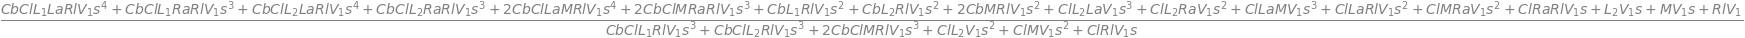

In [15]:
Z_L = U_sym[v3]/U_sym[I_La]
Z_L

In [16]:
Z_L.factor()

In [17]:
Z_L.simplify()

Find $Z_{in}(s)$

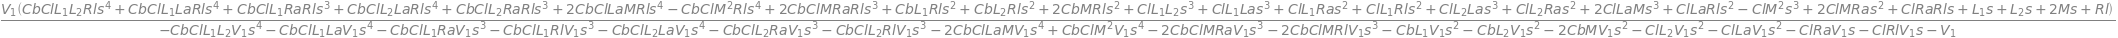

In [18]:
Z_in = U_sym[v1]/U_sym[I_V1]
Z_in

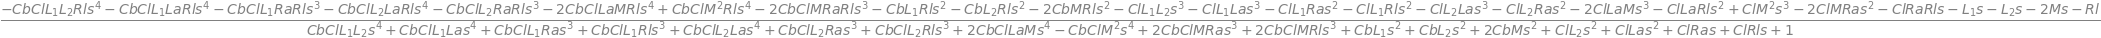

In [19]:
Z_in.simplify()

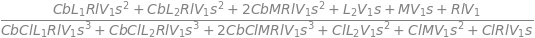

In [20]:
Z_out = U_sym[v2]/U_sym[I_La]
Z_out

In [21]:
Z_out.simplify()

In [22]:
Z_out.factor()

## The Bridged T-Coil

A **Bridged T-Coil**, often simply called a **T-coil**, is a specific type of circuit topology primarily used to **extend the bandwidth of high-speed electronic systems**, such as amplifiers, line drivers, and input/output (I/O) interfaces.

Here's a breakdown of what it is and why it's used:

**What it is:**

* **Components:** A bridged T-coil consists of two mutually coupled inductors (meaning they share magnetic flux, like a transformer) and a "bridge" capacitor that connects across the two series arms of the T-network.
* **Topology:** It gets its name from its "T" shaped configuration, with the added "bridge" capacitor making it a "bridged T." It's a special case of a two-port bridged-T network.
* **Mutual Inductance:** The mutual coupling between the inductors is a critical aspect of its operation, allowing it to achieve unique impedance and transfer function characteristics.

**Why it's used (Applications and Advantages):**

* **Bandwidth Enhancement:** This is its primary and most significant application. T-coils can extend the signal bandwidth of a circuit by a significantly greater factor than traditional inductive peaking techniques. This is crucial for high-speed data transmission where preserving signal integrity over a wide range of frequencies is essential.
* **Dealing with Parasitic Capacitances:** In high-speed integrated circuits (ICs), parasitic capacitances (unwanted capacitances that naturally occur in components and interconnections) can severely limit the circuit's operating frequency. T-coils are incorporated on-chip to counteract these parasitic effects and maintain performance.
* **Constant Input Impedance (Constant-R Networks):** Bridged T-coils can be designed to maintain a nearly constant input impedance over a wide frequency range. This is very important for impedance matching, preventing signal reflections, and allowing for cascading of multiple circuits without degradation.
* **Electrostatic Discharge (ESD) Protection:** T-coils are also used in ESD protection circuits, as they can effectively match the impedance of ESD devices over a broad band, ensuring robust protection without compromising high-frequency performance.
* **Historical Significance:** The concept of the T-coil dates back to 1948 and was famously used by Tektronix engineers in their wideband oscilloscope amplifiers in the 1960s, with design details being guarded as a trade secret for many years due to their significant performance advantage.

**Intuitive Understanding:**

While the detailed mathematical analysis can be complex, intuitively, the T-coil essentially introduces inductance that, in conjunction with the bridging capacitor, creates an artificial LC (inductor-capacitor) transmission line. This effectively "steers" current to where it's needed in the circuit at different frequencies, helping to quickly charge and discharge capacitive loads and thus extending the overall bandwidth.

In essence, a bridged T-coil is a clever circuit design that leverages coupled inductors and a capacitor to overcome the inherent speed limitations of electronic components, making it indispensable in modern high-speed communication and instrumentation systems.


**Generated as a report:**

### The Bridged T-Coil: A High-Speed Circuit Topology for Bandwidth Enhancement

The Bridged T-Coil, commonly referred to as a T-Coil, is a specialized circuit topology designed to extend the bandwidth of high-speed electronic systems. Its primary applications include amplifiers, line drivers, and input/output (I/O) interfaces.

**1. Circuit Structure**

A bridged T-coil is a two-port network characterized by its T-shaped configuration. It consists of two mutually coupled inductors and a bridging capacitor that connects across the two series arms of the T-network. The mutual inductance between the two inductors is a critical component of its operation, enabling unique impedance and transfer function characteristics.

**2. Applications and Advantages**

The use of bridged T-coils provides several significant advantages in high-frequency applications:

* **Bandwidth Enhancement:** The most significant application of the T-coil is the extension of a circuit's signal bandwidth. This is achieved at a much greater factor than traditional inductive peaking techniques, which is crucial for high-speed data transmission where signal integrity must be preserved across a broad range of frequencies.
* **Mitigation of Parasitic Capacitances:** In high-speed integrated circuits (ICs), parasitic capacitances can severely limit the operating frequency. T-coils are incorporated on-chip to counteract these parasitic effects, thereby maintaining performance.
* **Constant Input Impedance:** Bridged T-coils can be designed to maintain a nearly constant input impedance over a wide frequency range. This characteristic is vital for impedance matching, preventing signal reflections, and allowing for the cascading of multiple circuits without performance degradation.
* **Electrostatic Discharge (ESD) Protection:** T-coils are also utilized in ESD protection circuits. They effectively match the impedance of ESD devices over a broad band, providing robust protection without compromising high-frequency performance.

**3. Operational Principle**

While the detailed mathematical analysis is complex, the fundamental principle can be intuitively understood. The T-coil, through the combination of its coupled inductors and the bridging capacitor, creates an artificial LC (inductor-capacitor) transmission line. This structure effectively "steers" current to where it is needed within the circuit at various frequencies, which helps to quickly charge and discharge capacitive loads, thereby extending the overall bandwidth.

The concept of the T-coil has a notable history, dating back to 1948. Its design was famously used by Tektronix engineers in the wideband oscilloscope amplifiers of the 1960s, where it provided a significant performance advantage that was treated as a trade secret for many years. Today, the bridged T-coil remains an indispensable circuit design for overcoming the inherent speed limitations of electronic components in modern high-speed communication and instrumentation systems.



The concept of the T-coil circuit, also referred to as the "bridged-tee connection," can be traced back to a 1948 paper on distributed amplifiers by **Ginzton et al.**

While the initial theoretical basis was laid out, the practical application and extensive use of T-coils for bandwidth enhancement were pioneered by **Tektronix engineers** in the late 1960s. For many years, Tektronix guarded the design details of T-coil circuits as a trade secret. It wasn't until 1990 that **Dennis Feucht**, a former Tektronix engineer, provided design equations in his book.

It's worth noting that some sources mention **K.T. Wang**'s earlier work in the 1930s on a new method of analysis of electrical networks, which some network theorists later recognized as forming an algebra that was relevant to T-coils. However, his work was not widely published in English journals at the time.

So, while Ginzton et al. described the structure, Tektronix engineers (particularly Bob Ross and John Addis) were instrumental in developing and utilizing the bridged T-coil for practical applications like oscilloscope amplifiers, and Dennis Feucht later made the design equations publicly available.

A bridged T-coil (often simply called a T-coil) is a circuit topology primarily used for **bandwidth extension** and **impedance matching** in high-speed electronic circuits. Its unique ability to extend bandwidth significantly beyond what is achievable with simpler techniques like inductive peaking has made it a crucial component in various applications.

### Structure of a Bridged T-Coil

The core of a bridged T-coil circuit consists of:
* **Two mutually coupled inductors (L1 and L2):** These inductors are typically chosen to be equal (symmetric T-coil), and their mutual inductance (M) plays a critical role in the circuit's behavior. The coupling factor ($k$) between them is a key design parameter.
* **A bridge capacitor (Cb):** This capacitor connects across the two inductors, forming the "bridge" in the T-coil configuration.

The circuit is often used in conjunction with a load capacitance ($C_L$) and a load resistance ($R_L$), which represent parasitic capacitances and impedance-matching requirements in real-world applications (e.g., input capacitance of an amplifier, ESD protection diodes).

### Analysis and Functionality

The analysis of a bridged T-coil can be algebraically complex, but its fundamental operation revolves around creating a two-pole filter that can significantly extend the bandwidth compared to a simple RC low-pass filter. Here's a breakdown of its key aspects:

1.  **Bandwidth Enhancement:**
    * **Overcoming RC Limitations:** In many high-frequency circuits, parasitic capacitances (e.g., input capacitance of transistors, ESD protection diodes) combine with load resistances to form an RC low-pass filter, limiting the circuit's bandwidth.
    * **Inductive Peaking vs. T-Coil:** Simple inductive peaking adds an inductor in series with the load resistor to compensate for the capacitive rolloff, but it has limited bandwidth improvement. The bridged T-coil offers a much greater bandwidth extension (e.g., up to 2.8 times that of an RC filter for a maximally flat amplitude response).
    * **Mechanism:** The coupled inductors and the bridge capacitor work together to "steer" current into the capacitive load more efficiently at higher frequencies. Intuitively, the inductors introduce a form of "negative inductance" or resonance that can cancel out the effects of parasitic capacitance over a wider frequency range.

2.  **Impedance Matching:**
    * A well-designed T-coil can provide a **constant and resistive input impedance** over a broad frequency range. This is particularly valuable for transmission line termination and multi-drop systems where maintaining a consistent impedance is crucial to avoid reflections and signal degradation.

3.  **Transfer Function:**
    * The behavior of the bridged T-coil is analyzed by deriving its transfer function (e.g., output voltage to input voltage or input current to output voltage). This involves solving a system of equations for the circuit, often using techniques like the Extra-Element Theorem to simplify the analysis.
    * The transfer function typically exhibits a second-order response with specific poles and zeros. By carefully selecting the component values (L, M, Cb), these poles and zeros can be manipulated to achieve desired characteristics, such as maximally flat amplitude (MFA) or maximally flat envelope delay (MFED) responses.

### Key Design Parameters and Considerations

* **Inductance (L1, L2) and Mutual Inductance (M):** The values of the inductors and their coupling factor ($k = M/\sqrt{L_1 L_2}$) are crucial. For symmetric T-coils, $L_1 = L_2 = L$.
* **Bridge Capacitance (Cb):** This capacitor is critical for achieving the desired frequency response and impedance characteristics.
* **Load Capacitance (CL) and Load Resistance (RL):** These represent the external circuit elements that the T-coil is designed to compensate for.
* **Damping Factor ($\zeta$):** This parameter determines the flatness of the frequency response. A common target for maximally flat amplitude is $\zeta = 1/\sqrt{2} \approx 0.707$.
* **Optimal Design:** Achieving optimal performance often involves specific relationships between the component values. For example, for a symmetric T-coil with maximally flat amplitude, there are well-known design equations that link L, Cb, R, and CL.

### Applications

Bridged T-coils are widely used in:

* **High-Speed Amplifiers:** Especially in wideband amplifiers for applications like oscilloscopes (historically pioneered by Tektronix) and data communication systems (e.g., limiting amplifiers in wireline transceivers).
* **Wireline Communications:** In high-speed serial links (SerDes) operating at data rates like 56-112 Gb/s, T-coils are integrated on-chip to compensate for parasitic capacitances, particularly those introduced by electrostatic discharge (ESD) protection circuits and input/output (I/O) interfaces.
* **ESD Protection Circuits:** They can be used to improve the high-frequency performance of ESD protection devices by resonating out their parasitic capacitance.
* **Video Distribution:** Their constant input impedance makes them useful for tapping and distributing video signals to multiple loads.

### Challenges

Despite their advantages, designing and implementing bridged T-coils can present challenges:

* **Precision of Component Values:** Achieving optimal performance often requires precise values for the inductors and capacitors, which can be difficult to realize, especially with discrete components or in integrated circuits where process variations exist.
* **On-Chip Implementation:** For integrated circuits, creating well-defined mutual coupling between on-chip spiral inductors and managing their parasitic capacitances and finite Q-factors introduces additional design complexities.
* **Algebraic Complexity:** The analytical derivation of their transfer functions and optimal design parameters can be mathematically intensive, often requiring specialized techniques like the Extra-Element Theorem.

In summary, the bridged T-coil is a sophisticated circuit element that leverages mutual inductance and capacitance to significantly enhance bandwidth and provide excellent impedance matching in high-frequency applications, particularly in the realm of high-speed data communications and wideband amplification.

The Bridged T-Coil, while its theoretical basis goes back to a 1948 paper by Ginzton et al. and even earlier work by K.T. Wang in the 1930s, saw its most significant practical development and application as a trade secret by Tektronix engineers in the late 1960s. This history makes pinpointing a single, definitive patent tricky, as the core concept might be foundational, while specific implementations or improvements are patented.

However, based on patent searches and historical accounts, a key patent that directly addresses a "bridged-T termination network" and is highly relevant to the concept is:

* **US3155927A - Bridged-t termination network**
    * **Inventors:** Thomas T. True
    * **Assignee:** General Electric Co.
    * **Filed:** September 12, 1960
    * **Issued:** November 3, 1964

This patent describes a termination network providing a constant input impedance with a capacitive load, specifically mentioning a "bridged-T network as commonly represented in block form." While not directly by Tektronix, it reflects the state of the art and the patenting of bridged-T configurations.

It's also important to note that many of the applications and further developments of T-coils in high-speed electronics and integrated circuits have led to subsequent patents that build upon or utilize the core bridged T-coil concept. For example, the search results show patents like:

* **US20060109023A1 - T-coil apparatus and method for compensating capacitance** (Analog Devices Inc., filed 2003)
* **US3532982A - Transmission line termination circuit** (Tektronix Inc., filed 1967, issued 1970 - this one is cited by the True patent, indicating its relevance to Tektronix's work).

The reason it's not a single, easily traceable patent is that:

1.  **Fundamental concept vs. Specific Implementation:** The basic bridged-tee connection itself might be considered a fundamental circuit topology rather than a patentable invention in the modern sense after its initial theoretical description. Patents typically cover novel and non-obvious *implementations* or *applications* of such concepts.
2.  **Trade Secrets:** As mentioned previously, Tektronix famously kept the detailed design equations and methodologies for their T-coil implementations as trade secrets for many years. This meant they leveraged proprietary knowledge rather than relying solely on patents for competitive advantage in certain areas.
3.  **Ongoing Development:** The T-coil concept has been adapted and improved over decades, leading to numerous patents on specific circuit designs, integration techniques (e.g., on-chip T-coils), and applications (e.g., in ESD protection circuits, high-speed transceivers).

So, while US3155927A by Thomas T. True is a significant early patent for a "bridged-T termination network," the broader landscape of "bridged T-coil" technology is covered by a multitude of patents related to its various applications and refinements over time.


## MNA of the Bridged T-Coil
Derivation of equation from @Ross2011.


Use circuit 1b and 1c in in this section to walk through the equations.


SymPy derived equations

From: @Ross2011

T-coil summary

- Constant R provides ideal load or termination
- Up to 2.82 bandwidth improvement (BWER or bandwidth extension ratio) over RC based bandwidth
- 2.73 improvement for acceptable 0.4% overshoot to ideal step input (MFED or maximally flat envelope delay design)
- Now used in high-speed buffer design
  - ESD (electrostatic discharge) compensation
  - Bandwidth improvement

Schematic somewhat different

Wang Algebra

See page 12 for constant R and simplification


From: @Jeong2020

Topics in IC Design T-Coil

- Inductors produce peaking, thereby giving bandwidth extension.
- T-coil (Tee-Coil) produces even more bandwidth extension by giving negative inductance.

Introduced by Ginzton in 1948 as part of distributed amplifier.

Common Source Amplifier

Given RD and CL, what are CB, L, and M, assuming L1 = L2 = L (symmetric T-Coil)?

Four equations must be satisfied with five variables (CB, L, M, $\zeta$, $\omega _n$). Out of numerous solutions, what is the best transfer function that maximizes the bandwidth?


Effect of Large ESD Capacitance is removed.

E. Ginzton et. al, “Distributed Amplification,” Proc. IRE, vol. 36, pp. 956–969, Aug.
1948.





![T-Coil-basic](T-Coil-basic.png){#fig-t-coil-basic}

Change schematic name to t-coil-basic
Circuit description. 

This is simplified version of T-coil-ver1a. Following the Ross slides.

Also look at /home/jeff32/Downloads/T-Coil/Lec 10 - Bandwidth Extension Techniques.pdf for better derivation. But in this paper I don't follow the steps on slide 5.

- Complicated transfer function, 4th order demoninator
- need some design equations, simplifications, etc
- how do equations in book work?
- need to get the zeros to cancel two of the poles to have any hope of reducing the complexity
- Set $L_1=L_2$, but still a 4th order 

Here, M denotes the mutual induc-
tance between L 1 and L 2 with the
polarity shown in Figure 3(c). This
transfer function does not offer much
intuition but a special case thereof
is more mathematically manageable
and practically attractive. We assume
L 1 = L 2 = L and choose the values
such that the zeros in (1) are canceled
by two of the poles.


The following is from [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf)

When two zeros in the numerator are cancelled by two of the four
poles in the denominator, the second-order transfer function is
obtained.

Given $R_D$ and $C_L$, what are $C_B$, $L$, and $M$, assuming $L_1 = L_2 = L$
(symmetric T-Coil)?


$b_4\omega_n^2=a_2$

$b_3\omega_n^2=a_22\zeta\omega_n+a_1$

$b_2\omega_n^2=a_2\omega_n^2+a_12\zeta\omega_n+1$

$b_1\omega_n^2=a_1\omega_n^2+2\zeta\omega_n$


Four equations must be satisfied with five variables ($C_B$, $L$, $M$,
$\zeta$, $\omega_n$). Out of numerous solutions, what is the best transfer
function that maximizes the bandwidth?

Let k=M/L and simplify 4 equations.

Then, determine $\zeta$ that maximizes the bw.

Also see [Bandwidth Extension Techniques for CMOS Amplifiers](https://pdfs.semanticscholar.org/29db/7f450d63eee941424655fb787de7d644a3c2.pdf)

@Paramesh2006

/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil references/Analysis of the Bridged T-Coil Circuit Using the Extra-Element Theorem.pdf
```
@ARTICLE{Paramesh2006,
  author={Paramesh, Jeyanandh and Allstot, David J.},
  journal={IEEE Transactions on Circuits and Systems II: Express Briefs}, 
  title={Analysis of the Bridged T-Coil Circuit Using the Extra-Element Theorem}, 
  year={2006},
  volume={53},
  number={12},
  pages={1408-1412},
  keywords={Transfer functions;Impedance;CMOS technology;Broadband amplifiers;Bandwidth;Frequency;Capacitors;Driver circuits;Silicon germanium;Bandwidth extension;series peaking;shunt peaking;t-coil;wideband amplifier},
  doi={10.1109/TCSII.2006.885971}
}
```



In [23]:
T_Coil_ver1b_net_list = '''
* T-Coil-ver1b.asc
V1 1 0 1
L1 2 1 1
L2 3 2 1
C 2 0 1
C1 3 1 1
R 3 0 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [24]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_ver1b_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [25]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{3} - I_{L1} + I_{V1}$<br>$0 = C s v_{2} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{3} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{2}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [26]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations for the circuit in @fig-wien_bridge_loop_gain_sch can be solved symbolically. 

In [27]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [28]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + L_{2} V_{1} s + M V_{1} s + R V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$v_{3} = \frac{C C_{1} L_{1} L_{2} R V_{1} s^{4} - C C_{1} M^{2} R V_{1} s^{4} - C M R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + R V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{V1} = \frac{- C C_{1} L_{1} L_{2} V_{1} s^{4} - C C_{1} L_{1} R V_{1} s^{3} - C C_{1} L_{2} R V_{1} s^{3} + C C_{1} M^{2} V_{1} s^{4} - 2 C C_{1} M R V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R V_{1} s - C_{1} L_{1} V_{1} s^{2} - C_{1} L_{2} V_{1} s^{2} - 2 C_{1} M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{L1} = \frac{- C C_{1} L_{2} R V_{1} s^{3} - C C_{1} M R V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R V_{1} s - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{L2} = \frac{C C_{1} L_{1} R V_{1} s^{3} + C C_{1} M R V_{1} s^{3} + C M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [29]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial.

Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. 

The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [30]:
H_sym_num, H_sym_denom = fraction(H_sym)

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [31]:
H_sym_num.simplify()

In [32]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [33]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R$</p><p>$a_1=L_{2} + M$</p><p>$a_0=R$</p>

In [34]:
a2.factor()/R

In [35]:
a1.factor()/R

The numerator terms above agree with [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf), page 4.

$a_2=(L_1+L_2+2M)C_B$

$a_1=\frac{L_2+M}{R_D}$


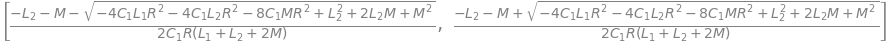

In [36]:
solve(H_sym_num,s)

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial is:

In [37]:
H_sym_denom.simplify()

In [38]:
H_sym_denom.collect(s)

In [39]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom.collect(s))))

$D(s)=R + s^{4} \left(C C_{1} L_{1} L_{2} R - C C_{1} M^{2} R\right) + s^{3} \left(C L_{1} L_{2} - C M^{2}\right) + s^{2} \left(C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R\right) + s \left(L_{1} + L_{2} + 2 M\right)$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [40]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=C C_{1} L_{1} L_{2} R - C C_{1} M^{2} R$</p><p>$b_3=C L_{1} L_{2} - C M^{2}$</p><p>$b_2=C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R$</p><p>$b_1=L_{1} + L_{2} + 2 M$</p><p>$b_0=R$</p>

In [41]:
b4.factor()/R

In [42]:
b3.factor()/R

In [43]:
b2.factor()/R

In [44]:
b1.factor()/R

The denominator term $b_4$ agrees with [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf), page 4., but other terms do not. 

The equations in [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf), page 4 are from @Razavi2015.

Who in turn referenced:

[8] J. Paramesh and D. J. Allstot, “Analysis
of the bridged T-coil circuit using the
extra-element theorem,” IEEE Trans. Cir-
cuits Syst.-II, vol. 53, pp. 1408–1412, Dec.
2006.

10.1109/TCSII.2006.885971

From above reference

The transfer function of interest in the BTC bandwidth
enhancement circuit is the transimpedance, $Z_t$ 
that relates the signal current from the driver transistor to the output voltage.


The fourth-order denominator in (12) may be expressed as
the product of two second-order polynomials: one equal to the
the numerator, $Z_t(s)$ and another polynomial, $ps^2+qs+1$.

Equating coefficients for each power of $s$, we obtain ...

more follows.





This reference from @Razavi2015 doesn't seem that relavent, just some alternat calculatuions. 


[9] S. C. D. Roy, “Comments on the ‘Analysis
of the bridged T-coil circuit using the ex-
tra-element theorem’,” IEEE Trans. Circuits
Syst.-II, vol. 54, pp. 673–674, Aug. 2007

10.1109/TCSII.2007.899834


Find $Z_{in}(s)$

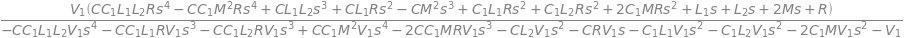

In [45]:
Z_in_sym = U_sym[v1]/U_sym[I_V1]
Z_in_sym

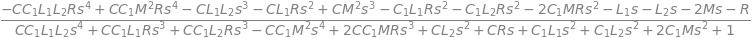

In [46]:
Z_in_sym.simplify()

Find $Z_t$, relates the signal current from the driver transistor to the output voltage.

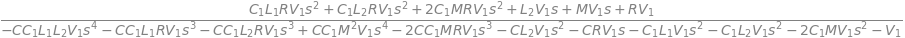

In [47]:
Zt_sym = U_sym[v2]/U_sym[I_V1]
Zt_sym

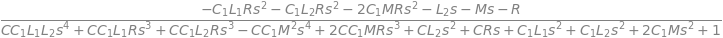

In [48]:
Zt_sym.simplify()

In [49]:
Zt_sym_num, Zt_sym_denom = fraction(Zt_sym.simplify())

In [50]:
Zt_sym_num.collect(s)

The coefficients of the numerator of $Z_t$ can be equated to the variables $c_2$, $c_1$ and $c_0$ in the expression: 

$c_2s^{2}+c_1s+c_0$

where $b_2$, $b_1$ and $b_0$ are:

In [51]:
c2 = Zt_sym_num.coeff(s**2)
c1 = Zt_sym_num.coeff(s**1)
c0 = (Zt_sym_num - c1*s*1 - c2*s**2).expand()

Markdown('<p>$c_2={:s}$</p><p>$c_1={:s}$</p><p>$c_0={:s}$</p>'.format(latex(c2),latex(c1),latex(c0)))

<p>$c_2=- C_{1} L_{1} R - C_{1} L_{2} R - 2 C_{1} M R$</p><p>$c_1=- L_{2} - M$</p><p>$c_0=- R$</p>

In [52]:
(c2/(-R)).factor()

In [53]:
(c1/(-R)).factor()

The $c_1$ term does not agree with the reference. Reference is $L_2/R$.

In [54]:
Zt_sym_denom

The coefficients of each Laplace term can be equated to the variables $d_3$, $d_2$, $d_1$ and $d_0$ in the expression: 

$d_4s^4+d_3s^3+d_2s^2+d_1s+d_0$

where $d_4$, $d_3$, $d_2$, $d_1$ and $d_0$ are:

In [55]:
d4 = Zt_sym_denom.coeff(s**4)
d3 = Zt_sym_denom.coeff(s**3)
d2 = Zt_sym_denom.coeff(s**2)
d1 = Zt_sym_denom.coeff(s**1)
d0 = (Zt_sym_denom - d1*s*1 - d2*s**2 - d3*s**3 - d4*s**4).expand()
Markdown('<p>$d_4={:s}$</p><p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>$d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d4),latex(d3),latex(d2),latex(d1),latex(d0)))

<p>$d_4=C C_{1} L_{1} L_{2} - C C_{1} M^{2}$</p><p>$d_3=C C_{1} L_{1} R + C C_{1} L_{2} R + 2 C C_{1} M R$</p><p>$d_2=C L_{2} + C_{1} L_{1} + C_{1} L_{2} + 2 C_{1} M$</p><p>$d_1=C R$</p><p>$d_0=1$</p>

Now take Zt_sym_num and multiply by $ps^2+qs+1$

In [56]:
p, q = symbols('p q')

In [57]:
Zt_sym_num*(p*s**2+q*s+1)

In [58]:
A_sym = (Zt_sym_num*(p*s**2+q*s+1)).expand().collect(s)
A_sym

The coefficients of each Laplace term can be equated to the variables $d_3$, $d_2$, $d_1$ and $d_0$ in the expression: 

$e_4s^4+e_3s^3+e_2s^2+e_1s+e_0$

where $e_4$, $e_3$, $e_2$, $e_1$ and $e_0$ are:

In [59]:
e4 = A_sym.coeff(s**4)
e3 = A_sym.coeff(s**3)
e2 = A_sym.coeff(s**2)
e1 = A_sym.coeff(s**1)
e0 = (A_sym - e1*s*1 - e2*s**2 - e3*s**3 - e4*s**4).expand()
Markdown('<p>$e_4={:s}$</p><p>$e_3={:s}$</p><p>$e_2={:s}$</p><p>$e_1={:s}$</p><p>$e_0={:s}$</p>'.format(latex(e4),latex(e3),latex(e2),latex(e1),latex(e0)))

<p>$e_4=- C_{1} L_{1} R p - C_{1} L_{2} R p - 2 C_{1} M R p$</p><p>$e_3=- C_{1} L_{1} R q - C_{1} L_{2} R q - 2 C_{1} M R q - L_{2} p - M p$</p><p>$e_2=- C_{1} L_{1} R - C_{1} L_{2} R - 2 C_{1} M R - L_{2} q - M q - R p$</p><p>$e_1=- L_{2} - M - R q$</p><p>$e_0=- R$</p>

The coeficients for each power of $s$ can be equated and we can solve for $p$ and $q$. We also have 3 equations and 2 unknowns.

In [60]:
d4

In [61]:
e4

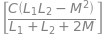

In [62]:
solve((e4/(-R)-d4),p)

In [63]:
solve((e4/(-R)-d4),q)

In [64]:
e3

In [65]:
d3

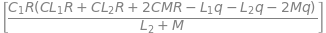

In [66]:
solve((e3/(-R)-d3),p)

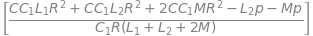

In [67]:
solve((e3/(-R)-d3),q)

In [68]:
e2

In [69]:
d2

In [70]:
solve((e2/(-R)-d2),p)

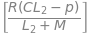

In [71]:
solve((e2/(-R)-d2),q)

In [72]:
e1

In [73]:
d1

In [74]:
e1/(-R)-d1

In [75]:
solve(e1/(-R)-d1,p)

In [76]:
solve(e1/(-R)-d1,q)

In [77]:
e0

In [78]:
d0

The d1 term and the d4 term give p and q solutions.

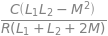

In [79]:
p = solve((e4/(-R)-d4/R),p)[0]
p

In [80]:
q = solve((e1/(-R)-d1/R),q)[0]
q

Putting $p$ and $q$ back into $ps^2+qs+1$ we should get one of the factors for $D(s)$ that cancels the zeros in $N(s)$.

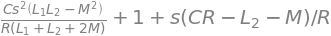

In [81]:
p*s**2+q*s+1

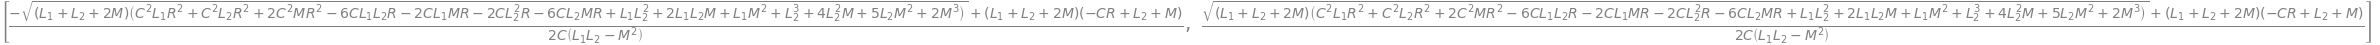

In [82]:
solve(p*s**2+q*s+1,s)

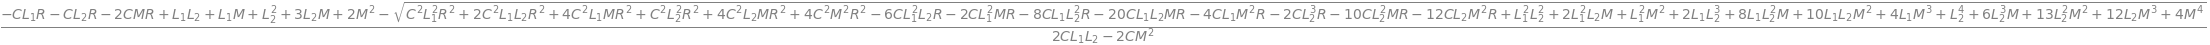

In [83]:
solve(p*s**2+q*s+1,s)[0].ratsimp() #simplify()

In [84]:
Zt_sym_num.collect(s)

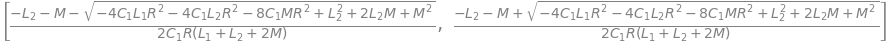

In [85]:
solve(Zt_sym_num,s)

The steps above don't seem like they give a $p$ and $q$ that will cancel the zeros.

### Trying some simplification and repeating the steps above using $H(s)$

$L_1=L_2=L$

### The steps below seem to work

In [86]:
L = symbols('L')

In [87]:
U_sym = solve(NE_sym.subs({L1:L, L2:L}),X)

Display the node voltages and dependent currents using symbolic notation.

In [88]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{2 C_{1} L R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + L V_{1} s + M V_{1} s + R V_{1}}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$<br>$v_{3} = \frac{C C_{1} L^{2} R V_{1} s^{4} - C C_{1} M^{2} R V_{1} s^{4} - C M R V_{1} s^{2} + 2 C_{1} L R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + R V_{1}}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$<br>$I_{V1} = \frac{- C C_{1} L^{2} V_{1} s^{4} - 2 C C_{1} L R V_{1} s^{3} + C C_{1} M^{2} V_{1} s^{4} - 2 C C_{1} M R V_{1} s^{3} - C L V_{1} s^{2} - C R V_{1} s - 2 C_{1} L V_{1} s^{2} - 2 C_{1} M V_{1} s^{2} - V_{1}}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$<br>$I_{L1} = \frac{- C C_{1} L R V_{1} s^{3} - C C_{1} M R V_{1} s^{3} - C L V_{1} s^{2} - C R V_{1} s - V_{1}}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$<br>$I_{L2} = \frac{C C_{1} L R V_{1} s^{3} + C C_{1} M R V_{1} s^{3} + C M V_{1} s^{2} - V_{1}}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [89]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + L s + M s + R}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$

In [90]:
H_sym_num, H_sym_denom = fraction(H_sym)

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [91]:
H_sym_num.simplify()

In [92]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + L s + M s + R$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [93]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=2 C_{1} L R + 2 C_{1} M R$</p><p>$a_1=L + M$</p><p>$a_0=R$</p>

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial is:

In [94]:
H_sym_denom.simplify()

In [95]:
H_sym_denom.collect(s)

In [96]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom.collect(s))))

$D(s)=R + s^{4} \left(C C_{1} L^{2} R - C C_{1} M^{2} R\right) + s^{3} \left(C L^{2} - C M^{2}\right) + s^{2} \left(C L R + 2 C_{1} L R + 2 C_{1} M R\right) + s \left(2 L + 2 M\right)$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [97]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=C C_{1} L^{2} R - C C_{1} M^{2} R$</p><p>$b_3=C L^{2} - C M^{2}$</p><p>$b_2=C L R + 2 C_{1} L R + 2 C_{1} M R$</p><p>$b_1=2 L + 2 M$</p><p>$b_0=R$</p>

### Now take H_sym_num and multiply by $ps^2+qs+1$
The fourth-order denominator in (12) may be expressed as
the product of two second-order polynomials: one equal to the
the numerator, $Z_t(s)$ and another polynomial, $ps^2+qs+1$.

In [98]:
p, q = symbols('p q')

In [99]:
H_sym_num*(p*s**2+q*s+1)

In [100]:
A_sym = (H_sym_num*(p*s**2+q*s+1)).expand().collect(s)
A_sym

The coefficients of each Laplace term can be equated to the variables $d_3$, $d_2$, $d_1$ and $d_0$ in the expression: 

$e_4s^4+e_3s^3+e_2s^2+e_1s+e_0$

where $e_4$, $e_3$, $e_2$, $e_1$ and $e_0$ are:

In [101]:
e4 = A_sym.coeff(s**4)
e3 = A_sym.coeff(s**3)
e2 = A_sym.coeff(s**2)
e1 = A_sym.coeff(s**1)
e0 = (A_sym - e1*s*1 - e2*s**2 - e3*s**3 - e4*s**4).expand()
Markdown('<p>$e_4={:s}$</p><p>$e_3={:s}$</p><p>$e_2={:s}$</p><p>$e_1={:s}$</p><p>$e_0={:s}$</p>'.format(latex(e4),latex(e3),latex(e2),latex(e1),latex(e0)))

<p>$e_4=2 C_{1} L R p + 2 C_{1} M R p$</p><p>$e_3=2 C_{1} L R q + 2 C_{1} M R q + L p + M p$</p><p>$e_2=2 C_{1} L R + 2 C_{1} M R + L q + M q + R p$</p><p>$e_1=L + M + R q$</p><p>$e_0=R$</p>

The coeficients for each power of $s$ can be equated and we can solve for $p$ and $q$. We also have 3 equations and 2 unknowns.

In [102]:
e4 - b4

In [103]:
p_sym = solve(e4 - b4,p)[0]
p_sym

In [104]:
e3 - b3

In [105]:
e2 - b2

In [106]:
e1 - b1

In [107]:
q_sym = solve(e1 - b1,q)[0]
q_sym

In [108]:
p_sym*s**2+q_sym*s+1

The second order polynominalabove is what is left in the demoninator after the poles and zeros cancel.

In [109]:
(p_sym*s**2+q_sym*s+1).simplify().expand().collect(s)

In [110]:
((p_sym*s**2+q_sym*s+1)*2*R).simplify().expand().collect(s)

multipl solutions are obtained.

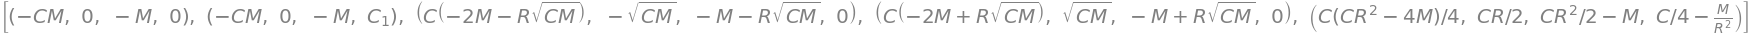

In [111]:
B_sym = solve([e4-b4, e3-b3, e2-b2, e1-b1], [p,q,L,C1])
B_sym

In [112]:
B_sym[-1]

In [113]:
p_sym = B_sym[-1][0]
p_sym

In [114]:
q_sym = B_sym[-1][1]
q_sym

In [115]:
L_sym = B_sym[-1][2]
L_sym

In [116]:
C1_sym = B_sym[-1][3]
C1_sym

In [117]:
(p_sym*s**2+q_sym*s+1)

In [118]:
C_sym = (p_sym*s**2+q_sym*s+1).simplify().expand().collect(s)
C_sym

In [119]:
g2 = C_sym.coeff(s**2)
g1 = C_sym.coeff(s**1)
g0 = (C_sym - g1*s*1 - g2*s**2).expand()

Markdown('<p>$g_2={:s}$</p><p>$g_1={:s}$</p><p>$g_0={:s}$</p>'.format(latex(g2),latex(g1),latex(g0)))

<p>$g_2=\frac{C^{2} R^{2}}{4} - C M$</p><p>$g_1=\frac{C R}{2}$</p><p>$g_0=1$</p>

### Need to check equations below.


For a two-pole lowpass filter, the transfer function of the filter is[17]

$H(s)=\frac {\omega_n^2}{s^2+\frac {\omega_n}{Q} s+\omega_n^2}$

For this system, when Q > ⁠1/2⁠ (i.e., when the system is underdamped), it has two complex conjugate poles that each have a real part of −α. That is, the attenuation parameter α represents the rate of exponential decay of the oscillations (that is, of the output after an impulse) into the system. A higher quality factor implies a lower attenuation rate, and so high-Q systems oscillate for many cycles. For example, high-quality bells have an approximately pure sinusoidal tone for a long time after being struck by a hammer. 

equating the coefficients:

$\omega_n^2=\frac{g_0}{g_2}$

$\frac {\omega_n}{Q}=\frac {g_1}{g_2}$


rearanging the terms:

$\omega_n=\sqrt {\frac{g_0}{g_2}}$

In an electrical network, ω is a natural angular frequency of a response function f(t) if the Laplace transform F(s) of f(t) includes the term Ke−st, where s = σ + ωi for a real σ, and K ≠ 0 is a constant.[2] Natural frequencies depend on network topology and element values but not their input.[3] It can be shown that the set of natural frequencies in a network can be obtained by calculating the poles of all impedance and admittance functions of the network.[4] A pole of the network transfer function is associated with a natural angular frequencies of the corresponding response variable; however there may exist some natural angular frequency that does not correspond to a pole of the network function. These happen at some special initial states.[5]


$Q=\frac {g_2 \omega_n}{g_1}$


- A system with low quality factor (Q < ⁠1/2⁠) is said to be overdamped. Such a system doesn't oscillate at all, but when displaced from its equilibrium steady-state output it returns to it by exponential decay, approaching the steady state value asymptotically. It has an impulse response that is the sum of two decaying exponential functions with different rates of decay. As the quality factor decreases the slower decay mode becomes stronger relative to the faster mode and dominates the system's response resulting in a slower system. A second-order low-pass filter with a very low quality factor has a nearly first-order step response; the system's output responds to a step input by slowly rising toward an asymptote.
- A system with high quality factor (Q > ⁠1/2⁠) is said to be underdamped. Underdamped systems combine oscillation at a specific frequency with a decay of the amplitude of the signal. Underdamped systems with a low quality factor (a little above Q = ⁠1/2⁠) may oscillate only once or a few times before dying out. As the quality factor increases, the relative amount of damping decreases. A high-quality bell rings with a single pure tone for a very long time after being struck. A purely oscillatory system, such as a bell that rings forever, has an infinite quality factor. More generally, the output of a second-order low-pass filter with a very high quality factor responds to a step input by quickly rising above, oscillating around, and eventually converging to a steady-state value.
- A system with an intermediate quality factor (Q = ⁠1/2⁠) is said to be critically damped. Like an overdamped system, the output does not oscillate, and does not overshoot its steady-state output (i.e., it approaches a steady-state asymptote). Like an underdamped response, the output of such a system responds quickly to a unit step input. Critical damping results in the fastest response (approach to the final value) possible without overshoot. Real system specifications usually allow some overshoot for a faster initial response or require a slower initial response to provide a safety margin against overshoot.

$\zeta=\frac {1}{2Q}$


In [120]:
omega_n = sqrt(g0/g2).simplify()
Markdown('The natural frequency, $\omega_n={:s}$'.format(latex(omega_n)))

The natural frequency, $\omega_n=2 \sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}}$

In [121]:
quality_factor = (g2*omega_n/g1).simplify()
Markdown('The quality factor, $Q={:s}$'.format(latex(quality_factor)))

The quality factor, $Q=\frac{\sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}} \left(C R^{2} - 4 M\right)}{R}$

In [122]:
zeta = (1/(2*quality_factor)).simplify()
Markdown('The damping ratio, $\zeta={:s}$'.format(latex(zeta)))

The damping ratio, $\zeta=\frac{R}{2 \sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}} \left(C R^{2} - 4 M\right)}$

### Numerical Example

For $\zeta = \sqrt{0.5}$, solve for $M$, given $C$ and $R$.

In [123]:
Cn=100e-9
Rn=3000

Mn = solve(zeta.subs({C:Cn,R:Rn})-sqrt(1/2), M)[0]
Mn

In [124]:
C1n=C1_sym.subs({C:Cn,M:Mn,R:Rn})
C1n

In [125]:
Ln=L_sym.subs({C:Cn,M:Mn,R:Rn})
Ln

In [126]:
omega_n.subs({C:Cn,M:Mn,R:Rn})/(2*np.pi)

#### Making some substitutions
H_sym from above is:

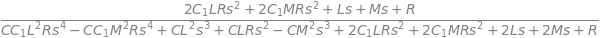

In [127]:
H_sym

making the substitutions, we get a numerical transfer function.

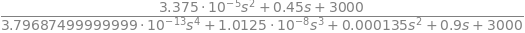

In [128]:
H = H_sym.subs({L:Ln, C:Cn, C1:C1n, R:Rn, M:Mn})
H

#### Conver Transfer function to NumPy

In [129]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

#### Pole Zero Plot
The poles and zeros of the transfer function can easily be obtained with the following code:

In [130]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane with the following code:

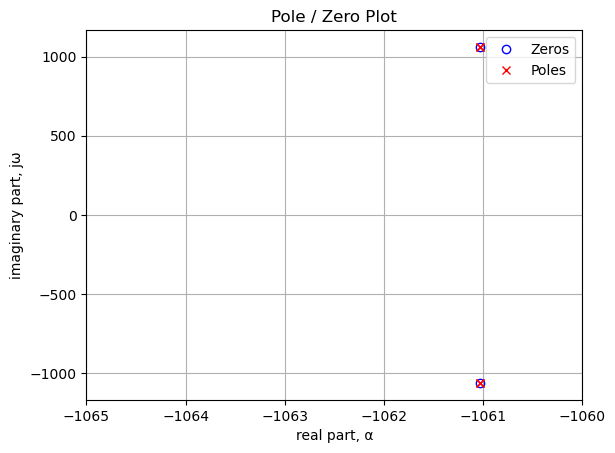

In [131]:
plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
plt.xlim((-1065,-1060))
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The code below generates a table that lists the values of the pole and zero locations. 

In [132]:
table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz              Poles, Hz
---------------------  ---------------------
-1061.0330+1061.0330j  -1061.0330+1061.0330j
-1061.0330-1061.0330j  -1061.0330-1061.0330j
                       -1061.0329+1061.0329j
                       -1061.0329-1061.0329j


Comments ...   
Include some comments about the Poles and zeros all being at the same location. Can two of the poles be moved to a different location?  

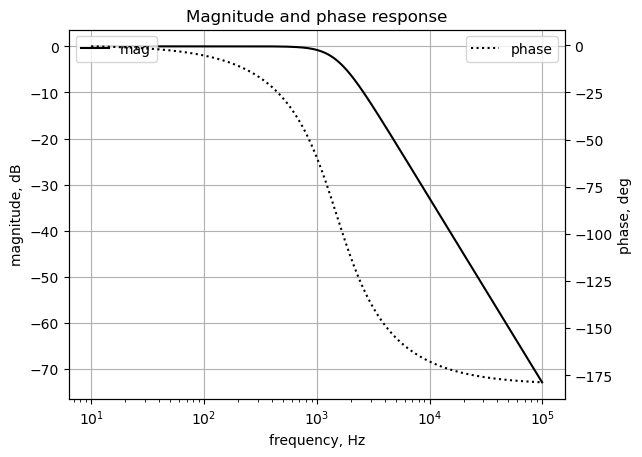

In [133]:
# setup
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-k',label='mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':k',label='phase')  # phase plot

#ax1.set_ylim((-40,5))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

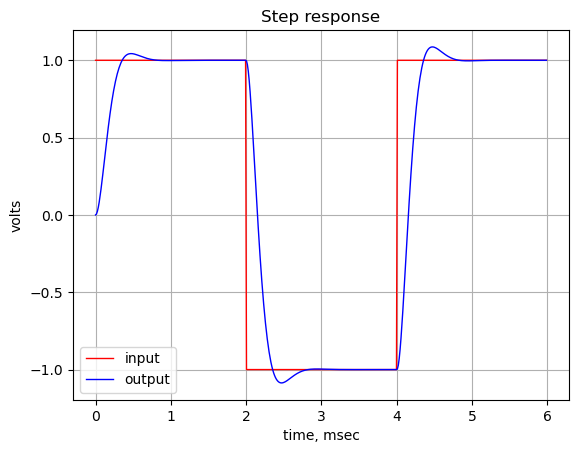

In [134]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, .006, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*250*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

Review other presentations. Do my claculations make sense?

## Old below here
### Making some substitutions

Let 

$k=1$ and $L_1=L_2=L$

$M=k\sqrt{L_1L_2}$, if k=1, then the demoninator reduces to a 2nd order polynomial.

and put some values in for C and R.

In [135]:
k = symbols('k')

In [136]:
k=.3
Cn=1e-9
Rn=3e3

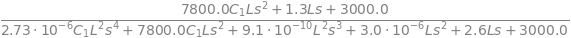

In [137]:
H_sym.subs({L1:L, L2:L, C:Cn, R:Rn, M:k*L})

In [138]:
H1_sym_num, H1_sym_denom = fraction(H_sym.subs({L1:L,L2:L,C:Cn,R:Rn, M:k*L}))

In [139]:
H1_sym_num

In [140]:
H1_sym_denom

In [141]:
#solve(H_sym_denom,s)

At this point we can get $\omega_n$ and $\zeta$, then pick $\zeta=\frac{1}{\sqrt{2}}$ and solve for $C_1$ and $L$

In [142]:
c4 = H1_sym_denom.coeff(s**4)
c3 = H1_sym_denom.coeff(s**3)
c2 = H1_sym_denom.coeff(s**2)
c1 = H1_sym_denom.coeff(s**1)
c0 = (H1_sym_denom - c1*s*1 - c2*s**2 - c3*s**3 - c4*s**4).expand()
Markdown('<p>$c_4={:s}$</p><p>$c_3={:s}$</p><p>$c_2={:s}$</p><p>$c_1={:s}$</p><p>$c_0={:s}$</p>'.format(latex(c4),latex(c3),latex(c2),latex(c1),latex(c0)))

<p>$c_4=2.73 \cdot 10^{-6} C_{1} L^{2}$</p><p>$c_3=9.1 \cdot 10^{-10} L^{2}$</p><p>$c_2=7800.0 C_{1} L + 3.0 \cdot 10^{-6} L$</p><p>$c_1=2.6 L$</p><p>$c_0=3000.0$</p>

### Need to check equations below.

In [143]:
omega_n = sqrt(c0/c2)
Markdown('The natural frequency, $\omega_n={:s}$'.format(latex(omega_n)))

The natural frequency, $\omega_n=54.7722557505166 \sqrt{\frac{1}{7800.0 C_{1} L + 3.0 \cdot 10^{-6} L}}$

In [144]:
BW = (c1/c2)
Markdown('The bandwidth, $BW={:s}$'.format(latex(BW)))

The bandwidth, $BW=\frac{2.6 L}{7800.0 C_{1} L + 3.0 \cdot 10^{-6} L}$

In [145]:
quality_factor = omega_n/BW
Markdown('The quality factor, $Q={:s}$'.format(latex(quality_factor)))

The quality factor, $Q=\frac{21.0662522117372 \cdot \left(7800.0 C_{1} L + 3.0 \cdot 10^{-6} L\right) \sqrt{\frac{1}{7800.0 C_{1} L + 3.0 \cdot 10^{-6} L}}}{L}$

In [146]:
zeta = 1/(2*quality_factor)
Markdown('The damping ratio, $\zeta={:s}$'.format(latex(zeta)))

The damping ratio, $\zeta=\frac{0.0237346441585572 L}{\left(7800.0 C_{1} L + 3.0 \cdot 10^{-6} L\right) \sqrt{\frac{1}{7800.0 C_{1} L + 3.0 \cdot 10^{-6} L}}}$

In [147]:
Ln=10e-3
C1n = solve(zeta.subs({L:Ln})-sqrt(0.5),C1)[0]
C1n

The value for C1n should be positive.

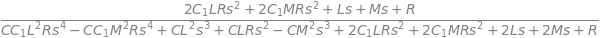

In [148]:
H_sym

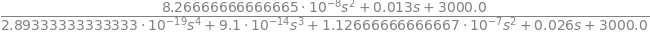

In [149]:
H = H_sym.subs({L:Ln, C:Cn, C1:C1n, R:Rn, M:k*Ln})
H

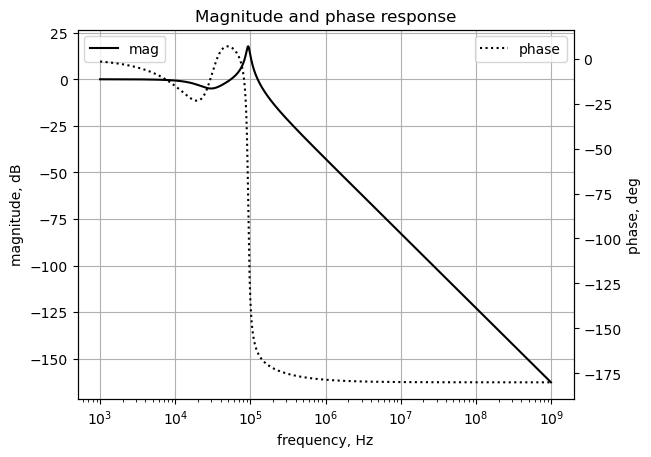

In [150]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

# setup
x_axis = np.logspace(3, 9, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-k',label='mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':k',label='phase')  # phase plot

#ax1.set_ylim((-40,5))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

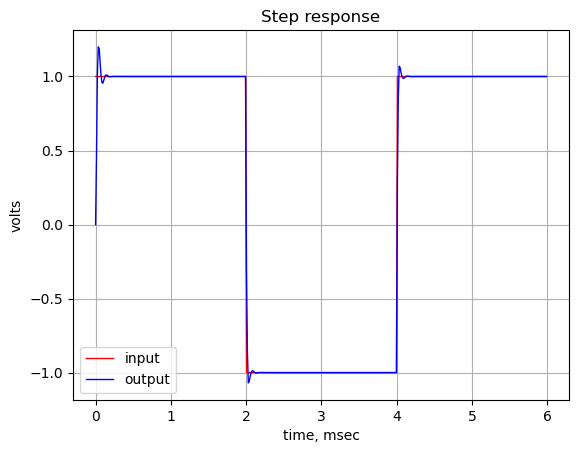

In [151]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, .006, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*250*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Ross Presentation
The circuit in @fig-t-coil-1c is from Ross presentation

This circuit seems to work, need to do a numerical example to finish the problem

Did find references to mutual inductance t equalivent circuit. Need to review location of phasing dots on the inductors.

![T coil ver 1c](T-coil-ver1c.png){#fig-t-coil-1c}

What about the phase dots? are they correct? 

This is simplified version of T-coil-ver1a. Following the Ross slides.

### Network Equations
The netlist for the schematic above was generated by LTSpice and copied into the cell below.

In [152]:
T_Coil_ver1c_net_list = '''
* T-Coil-ver1c.asc
V1 1 0 1
L1 3 1 1
L2 4 3 1
C 2 0 1
C1 4 1 1
R 4 0 1
L 3 2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [153]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_ver1c_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [154]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{4} - I_{L1} + I_{V1}$<br>$0 = C s v_{2} - I_{L}$<br>$0 = I_{L} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{4} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - v_{1} + v_{3}$<br>$0 = - I_{L2} L_{2} s - v_{3} + v_{4}$<br>$0 = - I_{L} L s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [155]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations for the circuit in @fig-wien_bridge_loop_gain_sch can be solved symbolically. 

In [156]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [157]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + L_{2} V_{1} s + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$v_{3} = \frac{C C_{1} L L_{1} R V_{1} s^{4} + C C_{1} L L_{2} R V_{1} s^{4} + C L L_{2} V_{1} s^{3} + C L R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + L_{2} V_{1} s + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$v_{4} = \frac{C C_{1} L L_{1} R V_{1} s^{4} + C C_{1} L L_{2} R V_{1} s^{4} + C C_{1} L_{1} L_{2} R V_{1} s^{4} + C L R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{V1} = \frac{- C C_{1} L L_{1} V_{1} s^{4} - C C_{1} L L_{2} V_{1} s^{4} - C C_{1} L_{1} L_{2} V_{1} s^{4} - C C_{1} L_{1} R V_{1} s^{3} - C C_{1} L_{2} R V_{1} s^{3} - C L V_{1} s^{2} - C L_{2} V_{1} s^{2} - C R V_{1} s - C_{1} L_{1} V_{1} s^{2} - C_{1} L_{2} V_{1} s^{2} - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L1} = \frac{- C C_{1} L_{2} R V_{1} s^{3} - C L V_{1} s^{2} - C L_{2} V_{1} s^{2} - C R V_{1} s - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L2} = \frac{C C_{1} L_{1} R V_{1} s^{3} - C L V_{1} s^{2} - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L} = \frac{C C_{1} L_{1} R V_{1} s^{3} + C C_{1} L_{2} R V_{1} s^{3} + C L_{2} V_{1} s^{2} + C R V_{1} s}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [158]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{2} s + R}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial.

Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. 

The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [159]:
H_sym_num, H_sym_denom = fraction(H_sym) #returns numerator and denominator

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [160]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{2} s + R$

The coefficients of each Laplace term can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [161]:
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = (H_sym_num - b1*s*1 - b2*s**2).expand()

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=C_{1} L_{1} R + C_{1} L_{2} R$</p><p>$b_1=L_{2}$</p><p>$b_0=R$</p>

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial is:

In [162]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R$

The coefficients of each Laplace term can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_4s^4+a_3s^3+a_2s^2+a_1s+a_0$

where $a_4$, $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [163]:
a4 = H_sym_denom.coeff(s**4)
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = (H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3 - a4*s**4).expand()
Markdown('<p>$a_4={:s}$</p><p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a4),latex(a3),latex(a2),latex(a1),latex(a0)))

<p>$a_4=C C_{1} L L_{1} R + C C_{1} L L_{2} R + C C_{1} L_{1} L_{2} R$</p><p>$a_3=C L L_{1} + C L L_{2} + C L_{1} L_{2}$</p><p>$a_2=C L R + C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R$</p><p>$a_1=L_{1} + L_{2}$</p><p>$a_0=R$</p>

Complicated transfer function ...

### The math works below here

Using these substitutions from Ross's presentation.

$L_1 = L_2 = L = \frac {R^2C}{2}$


$M = R^2C_1-\frac {L}{2} = R^2C_1-\frac {\frac {R^2C}{2}}{2}$

#### Need to work on how these were derived.

In [164]:
R**2*C/2

In [165]:
R**2*C1-L/2

In [166]:
R**2*C1-(R**2*C/2)/2

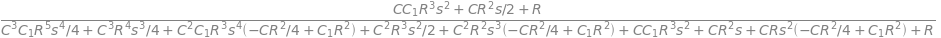

In [167]:
H1_sym = H_sym.subs({L1:R**2*C/2, L2:R**2*C/2, L:R**2*C1-(R**2*C/2)/2})
H1_sym

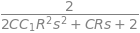

In [168]:
H1_sym.simplify()

In [169]:
H1_sym_num, H1_sym_denom = fraction(H1_sym.simplify()) #returns numerator and denominator

In [170]:
H1_sym_num = H1_sym_num/2
H1_sym_num

In [171]:
H1_sym_denom = H1_sym_denom/2
H1_sym_denom

In [172]:
c2 = H1_sym_denom.coeff(s**2)
c1 = H1_sym_denom.coeff(s**1)
c0 = (H1_sym_denom - c1*s*1 - c2*s**2).expand()
Markdown('<p>$c_2={:s}$</p><p>$c_1={:s}$</p><p>$c_0={:s}$</p>'.format(latex(c2),latex(c1),latex(c0)))

<p>$c_2=C C_{1} R^{2}$</p><p>$c_1=\frac{C R}{2}$</p><p>$c_0=1$</p>

In [173]:
omega_n = sqrt(c0/c2)
Markdown('The natural frequency, $\omega_n={:s}$'.format(latex(omega_n)))

The natural frequency, $\omega_n=\sqrt{\frac{1}{C C_{1} R^{2}}}$

In [174]:
BW = (c1/c2)
Markdown('The bandwidth, $BW={:s}$'.format(latex(BW)))

The bandwidth, $BW=\frac{1}{2 C_{1} R}$

In [175]:
quality_factor = omega_n/BW
Markdown('The quality factor, $Q={:s}$'.format(latex(quality_factor)))

The quality factor, $Q=2 C_{1} R \sqrt{\frac{1}{C C_{1} R^{2}}}$

In [176]:
zeta = 1/(2*quality_factor)
Markdown('The damping ratio, $\zeta={:s}$'.format(latex(zeta)))

The damping ratio, $\zeta=\frac{1}{4 C_{1} R \sqrt{\frac{1}{C C_{1} R^{2}}}}$

Restate demoninator interms of $\omega_n$ and $\zeta$. Select $\zeta$ and solve for component values.
#### Capacitive Load
In high-speed integrated circuits (ICs), parasitic capacitances (unwanted capacitances that naturally occur in components and interconnections) can severely limit the circuit's operating frequency. T-coils are incorporated on-chip to counteract these parasitic effects and maintain performance.

#### Numerical Example - do this in the sections below
Given a load The load capacitance, design the bridge T-coil circuit. 

Given
- load capacitance, C
- Load resistance, R
- $\zeta$

Solve for C1

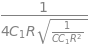

In [177]:
zeta

In [178]:
Cn=0.1e-6
Rn=1000

C1n = solve(zeta.subs({C:Cn,R:Rn})-0.707,C1)[0]
C1n

In [179]:
Ln = (R**2*C/2).subs({C:Cn,R:Rn})
Ln

In [180]:
Mn = (R**2*C1-(R**2*C/2)/2).subs({C:Cn,C1:C1n,R:Rn})
Mn

In [181]:
kn=Mn/Ln
kn

Can M be a negative value? Maybe if the phase dots are reversed?

Yes, mutual inductance can be negative, which typically indicates a phase inversion in the coil connections or the direction of the windings. However, the coupling coefficient is usually defined to be between -1 and 1, capturing these phase relationships.

Could reverse the nodes for L2, but try using a negative value for M

In [182]:
T_Coil_ver1b_net_list = '''
* T-Coil-ver1b.asc
V1 1 0 1
L1 2 1 1
L2 3 2 1
C 2 0 1
C1 3 1 1
R 3 0 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [183]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_ver1b_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [184]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{3} - I_{L1} + I_{V1}$<br>$0 = C s v_{2} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{3} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{2}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [185]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

In [186]:
M = symbols('M')

In [187]:
element_values[C] = Cn
element_values[C1] = C1n
element_values[L1] = Ln
element_values[L2] = Ln
element_values[R] = Rn
element_values[M] = Mn

In [188]:
element_values

In [189]:
equ_N = NE_sym.subs(element_values)

We get the following numerical network equations:

In [190]:
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(equ_N.lhs[i]))

Markdown(temp)

<p>$0 = - I_{L1} + I_{V1} + 1.25037761403944 \cdot 10^{-8} s v_{1} - 1.25037761403944 \cdot 10^{-8} s v_{3}$</p><p>$0 = I_{L1} - I_{L2} + 1.0 \cdot 10^{-7} s v_{2}$</p><p>$0 = I_{L2} - 1.25037761403944 \cdot 10^{-8} s v_{1} + v_{3} \cdot \left(1.25037761403944 \cdot 10^{-8} s + \frac{1}{1000}\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = - 0.05 I_{L1} s + 0.0124962238596056 I_{L2} s - v_{1} + v_{2}$</p><p>$0 = 0.0124962238596056 I_{L1} s - 0.05 I_{L2} s - v_{2} + v_{3}$</p>

SymPy can solve for unknown node voltages and the unknown currents from the independent voltage source, $V_1$. The node voltages and unknown current is:

In [191]:
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{1.83179227062092 \cdot 10^{49} s^{2} + 7.32495627742078 \cdot 10^{53} s + 1.953125 \cdot 10^{58}}{5.72400499045102 \cdot 10^{40} s^{4} + 4.57782107275512 \cdot 10^{45} s^{3} + 1.15974172706209 \cdot 10^{50} s^{2} + 1.46499125548416 \cdot 10^{54} s + 1.953125 \cdot 10^{58}}$</p><p>$v_{3} = \frac{5.72400499045102 \cdot 10^{40} s^{4} + 4.27246099320014 \cdot 10^{49} s^{2} + 1.953125 \cdot 10^{58}}{5.72400499045102 \cdot 10^{40} s^{4} + 4.57782107275512 \cdot 10^{45} s^{3} + 1.15974172706209 \cdot 10^{50} s^{2} + 1.46499125548416 \cdot 10^{54} s + 1.953125 \cdot 10^{58}}$</p><p>$I_{V1} = \frac{- 5.72400499045102 \cdot 10^{40} s^{4} - 1.83179227062092 \cdot 10^{45} s^{3} - 1.15974172706209 \cdot 10^{50} s^{2} - 1.953125 \cdot 10^{54} s - 1.953125 \cdot 10^{58}}{5.72400499045102 \cdot 10^{43} s^{4} + 4.57782107275512 \cdot 10^{48} s^{3} + 1.15974172706209 \cdot 10^{53} s^{2} + 1.46499125548416 \cdot 10^{57} s + 1.953125 \cdot 10^{61}}$</p><p>$I_{L1} = \frac{- 9.15896135310462 \cdot 10^{41} s^{3} - 9.765625 \cdot 10^{46} s^{2} - 1.953125 \cdot 10^{51} s - 1.953125 \cdot 10^{55}}{5.72400499045102 \cdot 10^{40} s^{4} + 4.57782107275512 \cdot 10^{45} s^{3} + 1.15974172706209 \cdot 10^{50} s^{2} + 1.46499125548416 \cdot 10^{54} s + 1.953125 \cdot 10^{58}}$</p><p>$I_{L2} = \frac{9.15896135310462 \cdot 10^{41} s^{3} - 2.44066872257922 \cdot 10^{46} s^{2} - 1.953125 \cdot 10^{55}}{5.72400499045102 \cdot 10^{40} s^{4} + 4.57782107275512 \cdot 10^{45} s^{3} + 1.15974172706209 \cdot 10^{50} s^{2} + 1.46499125548416 \cdot 10^{54} s + 1.953125 \cdot 10^{58}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$, is:

In [192]:
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{1.83179227062092 \cdot 10^{49} s^{2} + 7.32495627742078 \cdot 10^{53} s + 1.953125 \cdot 10^{58}}{5.72400499045102 \cdot 10^{40} s^{4} + 4.57782107275512 \cdot 10^{45} s^{3} + 1.15974172706209 \cdot 10^{50} s^{2} + 1.46499125548416 \cdot 10^{54} s + 1.953125 \cdot 10^{58}}$

### Transfer Function
The feedback transfer function of @fig-wien_bridge_loop_gain_sch is $H_{sym}(s)=\frac {v_2(s)}{v_1(s)}$. The magnitude and phase response is plotted below.

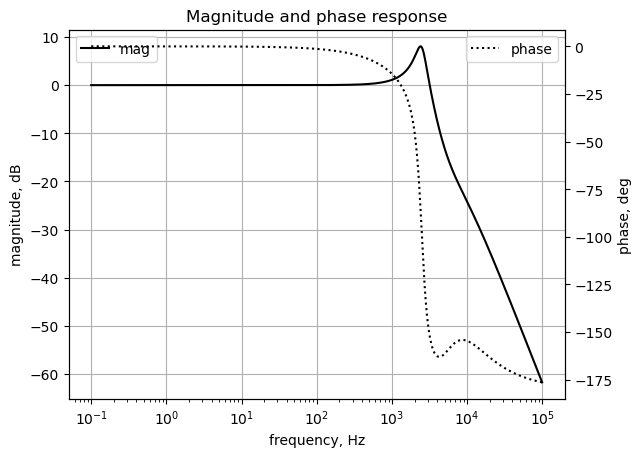

In [193]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

# setup
x_axis = np.logspace(-1, 5, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-k',label='mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':k',label='phase')  # phase plot

#ax1.set_ylim((-40,5))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

In [194]:
T_Coil_ver1c_net_list = '''
* T-Coil-ver1c.asc
V1 1 0 1
L1 3 1 1
L2 4 3 1
C 2 0 1
C1 4 1 1
R 4 0 1
L 3 2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [195]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_ver1c_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [196]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{4} - I_{L1} + I_{V1}$<br>$0 = C s v_{2} - I_{L}$<br>$0 = I_{L} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{4} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - v_{1} + v_{3}$<br>$0 = - I_{L2} L_{2} s - v_{3} + v_{4}$<br>$0 = - I_{L} L s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [197]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations for the circuit in @fig-wien_bridge_loop_gain_sch can be solved symbolically. 

In [198]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [199]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + L_{2} V_{1} s + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$v_{3} = \frac{C C_{1} L L_{1} R V_{1} s^{4} + C C_{1} L L_{2} R V_{1} s^{4} + C L L_{2} V_{1} s^{3} + C L R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + L_{2} V_{1} s + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$v_{4} = \frac{C C_{1} L L_{1} R V_{1} s^{4} + C C_{1} L L_{2} R V_{1} s^{4} + C C_{1} L_{1} L_{2} R V_{1} s^{4} + C L R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + R V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{V1} = \frac{- C C_{1} L L_{1} V_{1} s^{4} - C C_{1} L L_{2} V_{1} s^{4} - C C_{1} L_{1} L_{2} V_{1} s^{4} - C C_{1} L_{1} R V_{1} s^{3} - C C_{1} L_{2} R V_{1} s^{3} - C L V_{1} s^{2} - C L_{2} V_{1} s^{2} - C R V_{1} s - C_{1} L_{1} V_{1} s^{2} - C_{1} L_{2} V_{1} s^{2} - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L1} = \frac{- C C_{1} L_{2} R V_{1} s^{3} - C L V_{1} s^{2} - C L_{2} V_{1} s^{2} - C R V_{1} s - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L2} = \frac{C C_{1} L_{1} R V_{1} s^{3} - C L V_{1} s^{2} - V_{1}}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>$I_{L} = \frac{C C_{1} L_{1} R V_{1} s^{3} + C C_{1} L_{2} R V_{1} s^{3} + C L_{2} V_{1} s^{2} + C R V_{1} s}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [200]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{2} s + R}{C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial.

Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. 

The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [201]:
H_sym_num, H_sym_denom = fraction(H_sym) #returns numerator and denominator

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [202]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{2} s + R$

The coefficients of each Laplace term can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [203]:
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = (H_sym_num - b1*s*1 - b2*s**2).expand()

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=C_{1} L_{1} R + C_{1} L_{2} R$</p><p>$b_1=L_{2}$</p><p>$b_0=R$</p>

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial is:

In [204]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C C_{1} L L_{1} R s^{4} + C C_{1} L L_{2} R s^{4} + C C_{1} L_{1} L_{2} R s^{4} + C L L_{1} s^{3} + C L L_{2} s^{3} + C L R s^{2} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + L_{1} s + L_{2} s + R$

The coefficients of each Laplace term can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_4s^4+a_3s^3+a_2s^2+a_1s+a_0$

where $a_4$, $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [205]:
a4 = H_sym_denom.coeff(s**4)
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = (H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3 - a4*s**4).expand()
Markdown('<p>$a_4={:s}$</p><p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a4),latex(a3),latex(a2),latex(a1),latex(a0)))

<p>$a_4=C C_{1} L L_{1} R + C C_{1} L L_{2} R + C C_{1} L_{1} L_{2} R$</p><p>$a_3=C L L_{1} + C L L_{2} + C L_{1} L_{2}$</p><p>$a_2=C L R + C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R$</p><p>$a_1=L_{1} + L_{2}$</p><p>$a_0=R$</p>

The square wave response is shown below.

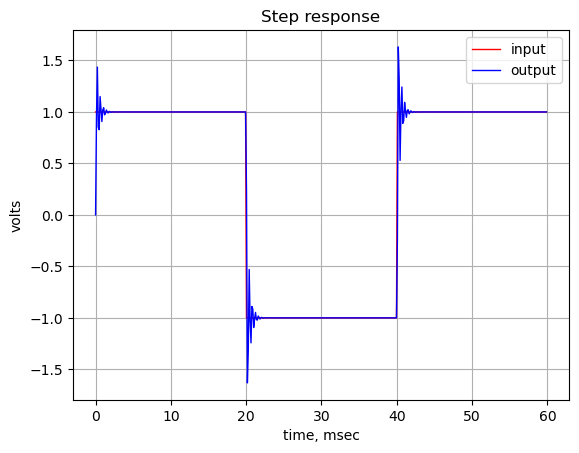

In [206]:
# convert symbolic to NumPy polynomial
#a = np.array(Poly(num, s).all_coeffs(), dtype=float)
#b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
#sys_tf = signal.TransferFunction(a,b)

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Applications of the Bridge T-Coil
**Continuation**

* **Historical Significance:** The concept of the T-coil dates back to 1948 and was famously used by Tektronix engineers in their wideband oscilloscope amplifiers in the 1960s, with design details being guarded as a trade secret for many years due to their significant performance advantage.


### Bandwidth Enhancement

This seem to be the same topic as Capacitive Load above. Do design example with realistic component values. 

In high-speed integrated circuits (ICs), parasitic capacitances (unwanted capacitances that naturally occur in components and interconnections) can severely limit the circuit's operating frequency. T-coils are incorporated on-chip to counteract these parasitic effects and maintain performance.

This is its primary and most significant application. T-coils can extend the signal bandwidth of a circuit by a significantly greater factor than traditional inductive peaking techniques. This is crucial for high-speed data transmission where preserving signal integrity over a wide range of frequencies is essential.


Include schematics of Fig 3 from @Razavi2015, see /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil-ver2.asc for udated schematic

As an example, consider the sim-
ple common-source stage shown in
Figure 3(a) with a load capacitance C L .
At high frequencies, the small-signal
drain current of M 1 is shunted by C L,
causing | Vout | to fall. We can place an
inductor in series with R D [Figure 3(b)]
so that the series impedance of R D and
L D increases with frequency, thereby
forcing a greater current through C L
and lessening the gain roll-off. Alterna-
tively, we can insert a T-coil circuit in the
signal path as illustrated in Figure 3(c).
We are interested in the transfer func-
tion Vout /Vin and its behavior as a
function of component values.

See US 9130535 patent for receint patent and some design notes.

US Patent No. 9,130,535, titled "Driver amplifier with asymmetrical T-coil matching network," describes an apparatus and method for designing a matching network for a driver amplifier. The patent, assigned to QUALCOMM Incorporated, was granted on September 8, 2015.

The invention focuses on improving the efficiency and size of driver amplifiers in electronic devices. The key components of the patent are:
* **Apparatus**: The patent describes an apparatus that includes a first inductor to receive an input signal and a second inductor connected to the first. These inductors are configured to create a "T-coil" with an asymmetrical matching network.
* **Method**: It also outlines a method for designing this circuit. The method involves converting a standard matching circuit into an inductor equivalent circuit, and then converting that into the asymmetric T-coil. This process simplifies the design and allows for a smaller physical circuit size.
* **Functionality**: The T-coil matching network is used to match the amplifier to a resistive load, which is a key function in ensuring the amplifier operates efficiently.

US Patent 9,130,535 contains three independent claims, which are the primary descriptions of the invention's scope.

**Claim 1** is an apparatus claim, outlining a device with two coupled inductors that form an asymmetric T-coil. The first inductor receives an input signal and provides an output to a resistive load. The second inductor is connected to a supply voltage, and the winding configurations of the two inductors are specifically designed to generate a coupling coefficient.

**Claim 15** is a similar apparatus claim, but it is written in "means-plus-function" language. It describes the same device in terms of "means for providing" the first and second inductances, rather than the specific components.

**Claim 19** is a method claim, describing the process for designing the circuit. This involves:
1.  Configuring a matching circuit to match an amplifier to a resistive load.
2.  Performing a first conversion to turn that matching circuit into an inductor equivalent circuit.
3.  Performing a second conversion to turn the inductor equivalent circuit into an asymmetric T-coil with coupled first and second inductor portions.



![T-Coil-common_source](T-Coil-common_source.png){#fig-t-coil-common_source} 

See @Razavi2015 and [Bandwidth Extension Techniques for CMOS Amplifiers](https://pdfs.semanticscholar.org/29db/7f450d63eee941424655fb787de7d644a3c2.pdf) for more info.


### Constant Input Impedance (Constant-R Networks)
Bridged T-coils can be designed to maintain a nearly constant input impedance over a wide frequency range. This is very important for impedance matching, preventing signal reflections, and allowing for cascading of multiple circuits without degradation.

Look at T-Coil basic, what is $Z_{in}(s)$ versus R? 

This is probably the same topic as Capacitive Load but looking at impedance vs bandwith  

See /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil references/Wang Algebra From Theory to Practice.pdf
for Constant R notes. Also history of BTC and math behind the design.

@Ross2022

```
@ARTICLE{Ross2022,
  author={Ross, Bob and Ling, Cong},
  journal={IEEE Open Journal of Circuits and Systems}, 
  title={Wang Algebra: From Theory to Practice}, 
  year={2022},
  volume={3},
  number={},
  pages={274-285},
  keywords={Algebra;Bandwidth;Graph theory;Transfer functions;Symmetric matrices;Mathematical models;Impedance;Bandwidth extension;bridged-T networks;matrix determinant;peaking;T-coil;Wang algebra;wideband amplifier},
  doi={10.1109/OJCAS.2022.3217065}
}
```

**Wang Algebra**

Wang algebra is a commutative algebra with the defining properties:
1.  $x+x = 0$
2.  $x \cdot x = 0$

It was introduced by Ki-Tung Wang in a 1934 paper as a simplified method for analyzing electrical networks. In essence, it is a clever way to compute the determinant of a symmetric matrix, which was a common but tedious task in electrical engineering before computers. The properties of Wang algebra allow many terms in a calculation to vanish, significantly reducing the complexity of the process.

The algebra was later formalized and popularized by mathematicians Raoul Bott and Richard Duffin in 1950, who recognized it as a specific form of Grassmann algebra over the finite field modulo 2.

Today, Wang algebra has found applications in:
* **Electrical engineering**: It is used in the design of electronic circuits, including T-coils and integrated circuits.
* **Graph theory**: The formulation is useful for problems involving graphs, such as generating the spanning trees of a graph.
* **Enzyme kinetics**: It has been used to systematically generate King-Altman directed graph patterns for deriving rate equations.

**Ki-Tung Wang**

Ki-Tung Wang (王季同, 1875-1954) was a Chinese researcher and engineer. He was born into a prominent family in Suzhou, Jiangsu Province. He received his education at the Imperial Tungwen College and worked in Britain, where he published a paper in English.

In 1928, he was appointed Research Fellow at the National Research Institute of Engineering, Academia Sinica. It was in this role that he developed and published his "new method of analysis of electrical networks," which became known as Wang algebra.

Wang's method was initially published in a Chinese journal, and it was some years later that it was introduced to the wider mathematical community. While some sources have suggested he could not write in English, historical records show he had published in English earlier in his career. It is possible that for his 1934 paper, he may have needed help with the English translation.





### Electrostatic Discharge (ESD) Protection
T-coils are also used in ESD protection circuits, as they can effectively match the impedance of ESD devices over a broad band, ensuring robust protection without compromising high-frequency performance.

Also see /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil references/Analyze T-Coil Circuit - MATLAB & Simulink.html  
This example shows how to use the Linear Circuit Wizard block to analyze a T-coil impedance matching circuit and generate S-parameter data from the result.  
The T-coil circuit is used in many applications to impedance match a capacitive load, such as an electrostatic discharge (ESD) protection device, over as broad a frequency band as possible [1], [2]. You need to include the effects of a T-coil circuit in the model of any broadband or microwave channel that uses it. Depending on the application, you may insert the transfer function of the circuit into a model of the channel or insert the S-parameters of the circuit into the RF analysis of the channel.  
This example analyzes the T-coil circuit shown in this schematic diagram. Capacitor Ce is the capacitor to be impedance matched [3]. The schematic includes the equivalent circuits for two S-parameter ports. For more about S-parameter ports, see the S-Parameters section of the example.  
this source sites the same references that I have.

![T-Coil-TVS schematic.](T-Coil-TVS.png){#fig-t-coil_tvs}  

```
* C:\users\jeff32\My Documents\Solving Electrical Engineering Problems with Python Blog\MNA Problem Circuits\T-Coil\T-Coil-TVS.asc
V1 1 0 1
L1 3 1 1 Rser=0
L2 2 3 1 Rser=0
C2 2 1 1
R1 2 0 1
XU1 3 0
K1 L1 L2 1
* Last update: 5 Aug 2025
* T-Coil-TVS
.lib Contrib/Toshiba/DIODE/DF2B5M5SL_enc.lib
.backanno
.end


```

# OLD Below

![T coil ver 2](T-coil-ver2.png){#fig-t-coil2}  

From: @Razavi2015

change V1 to current source.


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver2.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
R1 4 3 1
C1 3 1 1
C2 2 0 1
V2 4 0 1
.op
K1 L1 L2 0.5
* ;.ac list 1
.backanno
.end

```

### Circuit 3

![T coil ver 3](T-coil-ver3.png){#fig-t-coil3}  

Re draw T-coil-ver3.png as descriptive schematic with C replace by TVS symbol.

From: @Razavi2015


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver3.asc
V1 1 0 1
L1 2 1 1 Rser=0
L2 3 2 1 Rser=0
C1 2 0 1
C2 3 1 1
R1 3 0 1
K1 L1 L2 0.5
.op
.backanno
.end
```

### Circuit 4

![T coil ver 4](T-coil-ver4.png){#fig-t-coil4}  

From: @Razavi2015


```
* C:\users\jeff64\My Documents\T-Coil\T-Coil-ver4.asc
L1 1 2 1 Rser=0
L2 3 1 1 Rser=0
R1 4 3 1
C1 3 2 1
V2 4 0 1
I1 1 0 1
R2 2 0 1
C2 1 0 1
.op
K1 L1 L2 0.5
* ;.ac list 1
.backanno
.end

```

## Summary
  